In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import calendar
import glob


pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)
pd.set_option('display.width', 25)

#### Browsing .csv files

In [2]:
path = "C:\My projects\Python\Project 3\Python_Project_3_World_Election"

filenames = glob.glob(path + "\*.csv")
print('Filenames:', filenames,sep='\n' )

for file in filenames:
        print("Reading .csv files= ", file)
        print(pd.read_csv(file))

Filenames:
['C:\\My projects\\Python\\Project 3\\Python_Project_3_World_Election\\election_list results.csv', 'C:\\My projects\\Python\\Project 3\\Python_Project_3_World_Election\\leaders list in both regime and democratic govt.csv', 'C:\\My projects\\Python\\Project 3\\Python_Project_3_World_Election\\regime government.csv']
Reading .csv files=  C:\My projects\Python\Project 3\Python_Project_3_World_Election\election_list results.csv
      ccode  \
0       700   
1       700   
2       700   
3       700   
4       700   
...     ...   
4363    552   
4364    552   
4365    552   
4366    552   
4367    552   

      election number  \
0                   1   
1                   1   
2                   2   
3                   3   
4                   3   
...               ...   
4363               12   
4364               13   
4365               13   
4366               14   
4367               15   

          country  \
0     Afghanistan   
1     Afghanistan   
2     Afghanista

##### Open .csv files by pandas

In [3]:
dfResultElectionList = pd.read_csv('C:\My projects\Python\Project 3\Python_Project_3_World_Election\election_list results.csv')
dfLeaderList  = pd.read_csv('C:\My projects\Python\Project 3\Python_Project_3_World_Election\leaders list in both regime and democratic govt.csv')
dfGovernment  = pd.read_csv(r"C:\My projects\Python\Project 3\Python_Project_3_World_Election\regime government.csv")

##### Exploratory Data Analysis: dfResultElectionList

In [4]:
dfResultElectionList

,ccode,election number,country,election year,election month,election day,sequence,event,election number.1,type,direct,regular,victory,change,runoff
0,700,1,Afghanistan,1987,11,,1,Announced,700001,L,Y,N,Y,N,N
1,700,1,Afghanistan,1988,4,6,2,"Vote, Early",700001,L,Y,N,Y,N,N
2,700,2,Afghanistan,2004,7,,1,Deadline Not Met,700002,X,Y,N,NaN,NaN,N
3,700,3,Afghanistan,2004,7,,1,Announced,700003,X,Y,N,Y,N,N
4,700,3,Afghanistan,2004,10,9,2,"Vote, Early",700003,X,Y,N,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,552,12,Zimbabwe,2008,3,29,1,"Vote, As Scheduled",552012,X,Y,Y,NaN,NaN,1
4364,552,13,Zimbabwe,2008,3,29,1,Announced,552013,X,Y,Y,Y,N,2
4365,552,13,Zimbabwe,2008,6,27,2,"Vote, Early",552013,X,Y,Y,Y,N,2
4366,552,14,Zimbabwe,2013,7,31,1,"Vote, As Scheduled",552014,X,Y,Y,Y,N,N


##### Rename the name of columns

In [5]:
list(dfResultElectionList)

['ccode',
 'election number',
 'country',
 'election year',
 'election month ',
 'election day',
 'sequence',
 'event',
 'election number.1',
 'type',
 'direct',
 'regular',
 'victory',
 'change',
 'runoff']

In [6]:
dfResultElectionList.rename(columns = {'election number': 'Election Number',
                                       'country':'Country',
                                        'election year':'Election Year',
                                        'election month ':'Election Month',
                                        'election day':'Election Day',
                                        'sequence':'Sequence',
                                        'event':'Event',
                                        'election number.1':'Election Number',
                                        'type':'Type',
                                        'direct':'Direct',
                                        'regular':'Regular',
                                        'victory':'Victory',
                                        'change':'Change',
                                        'runoff':'Runoff Election'}, inplace=True)

In [7]:
list(dfResultElectionList)

['ccode',
 'Election Number',
 'Country',
 'Election Year',
 'Election Month',
 'Election Day',
 'Sequence',
 'Event',
 'Election Number',
 'Type',
 'Direct',
 'Regular',
 'Victory',
 'Change',
 'Runoff Election']

##### Look for NaN values

In [8]:
dfResultElectionList.isnull().sum()

ccode                0
Election Number      0
Country              0
Election Year        0
Election Month       0
Election Day         3
Sequence             0
Event                0
Election Number      0
Type                 2
Direct               0
Regular              3
Victory            691
Change             690
Runoff Election     20
dtype: int64

##### The percentage of missing values in each column

In [9]:
round((dfResultElectionList.isnull().sum()/(len(dfResultElectionList)))*100,2)

ccode               0.00
Election Number     0.00
Country             0.00
Election Year       0.00
Election Month      0.00
Election Day        0.07
Sequence            0.00
Event               0.00
Election Number     0.00
Type                0.05
Direct              0.00
Regular             0.07
Victory            15.82
Change             15.80
Runoff Election     0.46
dtype: float64

##### The analysis of NaN values

In [10]:
dfResultElectionList[dfResultElectionList.isnull().any(axis=1)]


,ccode,Election Number,Country,Election Year,Election Month,Election Day,Sequence,Event,Election Number,Type,Direct,Regular,Victory,Change,Runoff Election
2,700,2,Afghanistan,2004,7,,1,Deadline Not Met,700002,X,Y,N,NaN,NaN,N
6,700,5,Afghanistan,2014,4,5,1,"Vote, As Scheduled",700005,X,Y,Y,NaN,NaN,1
9,700,7,Afghanistan,2018,12,26,1,Delay Announced,700007,X,Y,Y,NaN,NaN,N
10,700,7,Afghanistan,2019,4,20,2,Voided,700007,X,Y,Y,NaN,NaN,N
11,700,8,Afghanistan,2019,3,20,1,Delay Announced,700008,X,Y,Y,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,101,23,Venezuela,2024,5,,1,"Upcoming, Deadline",101023,X,Y,Y,NaN,NaN,N
4325,679,7,Yemen,2014,2,,1,Deadline Not Met,679007,X,Y,N,NaN,NaN,N
4326,679,8,Yemen,2015,2,,1,Deadline Not Met,679008,X,Y,N,NaN,NaN,N
4345,620,6,Libya,2021,12,24,1,"Upcoming, Scheduled",620006,L,Y,N,NaN,NaN,N


In [11]:
dfResultElectionList[dfResultElectionList['Change'].isna()]

,ccode,Election Number,Country,Election Year,Election Month,Election Day,Sequence,Event,Election Number,Type,Direct,Regular,Victory,Change,Runoff Election
2,700,2,Afghanistan,2004,7,,1,Deadline Not Met,700002,X,Y,N,NaN,NaN,N
6,700,5,Afghanistan,2014,4,5,1,"Vote, As Scheduled",700005,X,Y,Y,NaN,NaN,1
9,700,7,Afghanistan,2018,12,26,1,Delay Announced,700007,X,Y,Y,NaN,NaN,N
10,700,7,Afghanistan,2019,4,20,2,Voided,700007,X,Y,Y,NaN,NaN,N
11,700,8,Afghanistan,2019,3,20,1,Delay Announced,700008,X,Y,Y,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,101,23,Venezuela,2024,5,,1,"Upcoming, Deadline",101023,X,Y,Y,NaN,NaN,N
4325,679,7,Yemen,2014,2,,1,Deadline Not Met,679007,X,Y,N,NaN,NaN,N
4326,679,8,Yemen,2015,2,,1,Deadline Not Met,679008,X,Y,N,NaN,NaN,N
4345,620,6,Libya,2021,12,24,1,"Upcoming, Scheduled",620006,L,Y,N,NaN,NaN,N


In [12]:
dfResultElectionList[dfResultElectionList['Runoff Election'].isna()]

,ccode,Election Number,Country,Election Year,Election Month,Election Day,Sequence,Event,Election Number,Type,Direct,Regular,Victory,Change,Runoff Election
331,53,12,Barbados,2023,5,,1,"Upcoming, Scheduled",53012,L,Y,Y,NaN,NaN,NaN
725,482,14,Central African Republic,2010,3,30,1,Announced,482014,X,Y,Y,NaN,NaN,NaN
726,482,14,Central African Republic,2010,5,,2,Deadline Not Met,482014,X,Y,Y,NaN,NaN,NaN
800,710,12,China,2022,10,,1,"Upcoming, Scheduled",710012,X,N,Y,NaN,NaN,NaN
831,100,23,Colombia,2022,5,1,1,"Upcoming, Scheduled",100023,X,Y,Y,NaN,NaN,NaN
1288,651,24,Egypt,2019,4,22,2,"Vote, As Scheduled",651024,R,Y,N,Y,N,NaN
1447,220,29,France,2022,4,,1,"Upcoming, Scheduled",220029,X,Y,Y,NaN,NaN,NaN
1629,55,9,Grenada,2016,9,23,1,Announced,55009,R,Y,N,NaN,NaN,NaN
1630,55,9,Grenada,2016,10,21,2,Delay Announced,55009,R,Y,N,NaN,NaN,NaN
1631,55,9,Grenada,2016,10,24,3,Deadline Not Met,55009,R,Y,N,NaN,NaN,NaN


##### Changing NaN values and blank space to either 1 or Not Available

In [13]:
dfResultElectionList['Election Day'] = dfResultElectionList['Election Day'].fillna(1)
dfResultElectionList['Election Day'] = dfResultElectionList['Election Day'].replace(' ',1,regex=True)
dfResultElectionList['Type'] = dfResultElectionList['Type'].fillna("Not Available")
dfResultElectionList['Regular'] = dfResultElectionList['Regular'].fillna("Not Available")
dfResultElectionList['Victory'] = dfResultElectionList['Victory'].fillna("Not Available")
dfResultElectionList['Change'] = dfResultElectionList['Change'].fillna("Not Available")
dfResultElectionList['Runoff Election'] = dfResultElectionList['Runoff Election'].fillna("Not Available")

In [14]:
dfResultElectionList.isnull().sum()

ccode              0
Election Number    0
Country            0
Election Year      0
Election Month     0
Election Day       0
Sequence           0
Event              0
Election Number    0
Type               0
Direct             0
Regular            0
Victory            0
Change             0
Runoff Election    0
dtype: int64

In [15]:
dfResultElectionList

,ccode,Election Number,Country,Election Year,Election Month,Election Day,Sequence,Event,Election Number,Type,Direct,Regular,Victory,Change,Runoff Election
0,700,1,Afghanistan,1987,11,1,1,Announced,700001,L,Y,N,Y,N,N
1,700,1,Afghanistan,1988,4,6,2,"Vote, Early",700001,L,Y,N,Y,N,N
2,700,2,Afghanistan,2004,7,1,1,Deadline Not Met,700002,X,Y,N,Not Available,Not Available,N
3,700,3,Afghanistan,2004,7,1,1,Announced,700003,X,Y,N,Y,N,N
4,700,3,Afghanistan,2004,10,9,2,"Vote, Early",700003,X,Y,N,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,552,12,Zimbabwe,2008,3,29,1,"Vote, As Scheduled",552012,X,Y,Y,Not Available,Not Available,1
4364,552,13,Zimbabwe,2008,3,29,1,Announced,552013,X,Y,Y,Y,N,2
4365,552,13,Zimbabwe,2008,6,27,2,"Vote, Early",552013,X,Y,Y,Y,N,2
4366,552,14,Zimbabwe,2013,7,31,1,"Vote, As Scheduled",552014,X,Y,Y,Y,N,N


##### Looking for duplicates

In [16]:
dfResultElectionList.duplicated().sum()

0

#### Customising data types of columns, then creating a date column from columns

In [17]:
dfResultElectionList.dtypes

ccode               int64
Election Number     int64
Country            object
Election Year       int64
Election Month      int64
Election Day       object
Sequence            int64
Event              object
Election Number     int64
Type               object
Direct             object
Regular            object
Victory            object
Change             object
Runoff Election    object
dtype: object

In [18]:
dfResultElectionList.astype({'Election Day': 'int64'}).dtypes

ccode               int64
Election Number     int64
Country            object
Election Year       int64
Election Month      int64
Election Day        int64
Sequence            int64
Event              object
Election Number     int64
Type               object
Direct             object
Regular            object
Victory            object
Change             object
Runoff Election    object
dtype: object

In [19]:
dfResultElectionList.rename(columns = {'Election Year':'year', 'Election Month':'month', 'Election Day':'day'}, inplace=True)
dfResultElectionList['Date of Election'] = pd.to_datetime(dfResultElectionList[['year', 'month', 'day']], errors='coerce')


In [20]:
dfResultElectionList.rename(columns = {'year':'Election Year',
                                       'month':'Election Month', 
                                       'day':'Election Day'},
                                        inplace=True)

In [21]:
seventh_columns = dfResultElectionList.pop('Date of Election')
dfResultElectionList.insert(6,'Date of Election',seventh_columns)

In [22]:
dfResultElectionList

,ccode,Election Number,Country,Election Year,Election Month,Election Day,Date of Election,Sequence,Event,Election Number,Type,Direct,Regular,Victory,Change,Runoff Election
0,700,1,Afghanistan,1987,11,1,1987-11-01,1,Announced,700001,L,Y,N,Y,N,N
1,700,1,Afghanistan,1988,4,6,1988-04-06,2,"Vote, Early",700001,L,Y,N,Y,N,N
2,700,2,Afghanistan,2004,7,1,2004-07-01,1,Deadline Not Met,700002,X,Y,N,Not Available,Not Available,N
3,700,3,Afghanistan,2004,7,1,2004-07-01,1,Announced,700003,X,Y,N,Y,N,N
4,700,3,Afghanistan,2004,10,9,2004-10-09,2,"Vote, Early",700003,X,Y,N,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,552,12,Zimbabwe,2008,3,29,2008-03-29,1,"Vote, As Scheduled",552012,X,Y,Y,Not Available,Not Available,1
4364,552,13,Zimbabwe,2008,3,29,2008-03-29,1,Announced,552013,X,Y,Y,Y,N,2
4365,552,13,Zimbabwe,2008,6,27,2008-06-27,2,"Vote, Early",552013,X,Y,Y,Y,N,2
4366,552,14,Zimbabwe,2013,7,31,2013-07-31,1,"Vote, As Scheduled",552014,X,Y,Y,Y,N,N


In [23]:
dfResultElectionList.astype({'Election Day':'int64'}).dtypes


ccode                        int64
Election Number              int64
Country                     object
Election Year                int64
Election Month               int64
Election Day                 int64
Date of Election    datetime64[ns]
Sequence                     int64
Event                       object
Election Number              int64
Type                        object
Direct                      object
Regular                     object
Victory                     object
Change                      object
Runoff Election             object
dtype: object

##### General information after cleaning:

In [24]:
dfResultElectionList.info(), dfResultElectionList.size, dfResultElectionList.shape, dfResultElectionList.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ccode             4368 non-null   int64         
 1   Election Number   4368 non-null   int64         
 2   Country           4368 non-null   object        
 3   Election Year     4368 non-null   int64         
 4   Election Month    4368 non-null   int64         
 5   Election Day      4368 non-null   object        
 6   Date of Election  4367 non-null   datetime64[ns]
 7   Sequence          4368 non-null   int64         
 8   Event             4368 non-null   object        
 9   Election Number   4368 non-null   int64         
 10  Type              4368 non-null   object        
 11  Direct            4368 non-null   object        
 12  Regular           4368 non-null   object        
 13  Victory           4368 non-null   object        
 14  Change            4368 n

(None,
 69888,
 (4368, 16),
 object            9
 int64             6
 datetime64[ns]    1
 Name: count, dtype: int64)

##### Exploratory Data Analysis: dfLeaderList

In [25]:
dfLeaderList

,stateabb,ccode,leadid,leader,sdate,smonth,syear,emonth,eyear,birthyear,gender,militarycareer,l_month,l_year
0,USA,2,A2.9-46,Truman,12,4,1945,1.0,1953.0,1884.0,1,0.0,11.0,1948.0
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1.0,1961.0,1890.0,1,1.0,11.0,1952.0
2,USA,2,A2.9-52,Kennedy,20,1,1961,11.0,1963.0,1917.0,1,0.0,11.0,1960.0
3,USA,2,A2.9-55,Johnson,22,11,1963,1.0,1969.0,1908.0,1,0.0,11.0,1964.0
4,USA,2,A2.9-58,Nixon,20,1,1969,8.0,1974.0,1913.0,1,0.0,11.0,1968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,WSM,990,kb-800-8,Tofilau Eti Alesana,31,12,1982,12.0,1985.0,1924.0,1,0.0,2.0,1985.0
2540,WSM,990,kb-800-9,Va'ai Kolone,30,12,1985,4.0,1988.0,1911.0,1,0.0,NaN,NaN
2541,WSM,990,kb-810-1,Tofilau Eti Alesana,8,4,1988,12.0,1998.0,1924.0,1,0.0,NaN,NaN
2542,WSM,990,kb-810-2,Tuilaepa Sailele Malielegaoi,23,12,1998,7.0,2021.0,1945.0,1,0.0,7.0,1998.0


##### Analysis of dataframe regarding NaN values and duplicates

In [26]:
for col in dfLeaderList.columns:
    pct_missing = round(np.mean(dfLeaderList[col].isnull()),2)
    print('{}-{}%'.format(col, pct_missing))

stateabb-0.0%
ccode-0.0%
leadid-0.0%
leader-0.0%
sdate-0.0%
smonth-0.0%
syear-0.0%
emonth-0.08%
eyear-0.08%
birthyear-0.0%
gender-0.0%
militarycareer-0.0%
l_month-0.51%
l_year-0.51%


##### Converting NaN values to 0

In [27]:
dfLeaderList = dfLeaderList.fillna(0)

##### Look for example data based on string:

In [28]:
dfLeaderList[dfLeaderList['leader'].str.match('Macron')]

,stateabb,ccode,leadid,leader,sdate,smonth,syear,emonth,eyear,birthyear,gender,militarycareer,l_month,l_year
636,FRN,220,se-220-2,Macron,14,5,2017,0.0,0.0,1977.0,1,0.0,5.0,2017.0


In [29]:
dfLeaderList[dfLeaderList['leader'].str.match('Bi')]

,stateabb,ccode,leadid,leader,sdate,smonth,syear,emonth,eyear,birthyear,gender,militarycareer,l_month,l_year
13,USA,2,ctb-2-1,Biden,20,1,2021,0.0,0.0,1942.0,1,0.0,11.0,2021.0
490,ARG,160,A2.9-2629,Bignone,1,7,1982,12.0,1983.0,1928.0,1,1.0,0.0,0.0
571,NTH,210,A2.9-3037,Biesheuvel,6,7,1971,5.0,1973.0,1920.0,1,0.0,4.0,1971.0
612,FRN,220,A2.9-3553,Bidault,28,10,1949,6.0,1950.0,1899.0,1,0.0,0.0,0.0
755,POL,290,A2.9-4414,Bierut,31,12,1944,3.0,1956.0,1892.0,1,0.0,1.0,1947.0
783,AUS,305,ctb-305-2,Bierlein,3,6,2019,1.0,2020.0,1949.0,0,0.0,0.0,0.0
1276,LAT,367,A2.9-5650,Birkavs,3,8,1993,9.0,1994.0,1942.0,1,0.0,6.0,1993.0
1351,SWD,380,A2.9-5932,Bildt,30,10,1991,10.0,1994.0,1949.0,1,0.0,9.0,1991.0
1548,SIE,451,A2.9-6529,Bio,17,1,1996,3.0,1996.0,1964.0,1,0.0,0.0,0.0
1575,CAO,471,A2.9-6586,Biya,6,11,1982,0.0,0.0,1933.0,1,0.0,1.0,1984.0


In [30]:
dfLeaderList[dfLeaderList['leader'].str.match('Du')]

,stateabb,ccode,leadid,leader,sdate,smonth,syear,emonth,eyear,birthyear,gender,militarycareer,l_month,l_year
47,HAI,41,A2.9-304,"Duvalier, Francois",15,10,1957,4.0,1971.0,1907.0,1,0.0,9.0,1957.0
48,HAI,41,A2.9-307,"Duvalier, Jean-",22,4,1971,2.0,1986.0,1951.0,1,0.0,1.0,1971.0
233,SAL,92,A2.9-961,Duarte,13,12,1980,5.0,1982.0,1925.0,1,0.0,0.0,0.0
235,SAL,92,A2.9-967,Duarte,1,6,1984,6.0,1989.0,1925.0,1,0.0,5.0,1984.0
359,ECU,130,A2.9-1789,Duran Ballen,10,8,1992,8.0,1996.0,1921.0,1,0.0,7.0,1992.0
390,BRA,140,A2.9-1996,Dutra,31,1,1946,1.0,1951.0,1885.0,1,1.0,12.0,1945.0
579,BEL,211,A2.9-3160,Duvieusart,8,6,1950,8.0,1950.0,1900.0,1,0.0,6.0,1950.0
603,LUX,212,A2.9-3244,Dupong,9,5,1945,12.0,1953.0,1885.0,1,0.0,5.0,1937.0
767,POL,290,cb-290-1,Duda,6,8,2015,0.0,0.0,1972.0,1,0.0,5.0,2015.0
802,CZE,315,A2.9-4594,Dubcek,5,1,1968,8.0,1968.0,1921.0,1,0.0,0.0,0.0


##### Changing data types of columns

In [31]:
dfLeaderList.dtypes

stateabb           object
ccode               int64
leadid             object
leader             object
sdate               int64
smonth              int64
syear               int64
emonth            float64
eyear             float64
birthyear         float64
gender              int64
militarycareer    float64
l_month           float64
l_year            float64
dtype: object

In [32]:
dfLeaderList = dfLeaderList.astype({"emonth":'int',
                                    "eyear":'int',
                                    "birthyear":'int',
                                    "gender":'int',
                                   "militarycareer":'int',
                                   "l_month":'int',
                                   "l_year":'int'})

In [33]:
dfLeaderList.dtypes

stateabb          object
ccode              int64
leadid            object
leader            object
sdate              int64
smonth             int64
syear              int64
emonth             int32
eyear              int32
birthyear          int32
gender             int32
militarycareer     int32
l_month            int32
l_year             int32
dtype: object

In [34]:
dfLeaderList

,stateabb,ccode,leadid,leader,sdate,smonth,syear,emonth,eyear,birthyear,gender,militarycareer,l_month,l_year
0,USA,2,A2.9-46,Truman,12,4,1945,1,1953,1884,1,0,11,1948
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1,1961,1890,1,1,11,1952
2,USA,2,A2.9-52,Kennedy,20,1,1961,11,1963,1917,1,0,11,1960
3,USA,2,A2.9-55,Johnson,22,11,1963,1,1969,1908,1,0,11,1964
4,USA,2,A2.9-58,Nixon,20,1,1969,8,1974,1913,1,0,11,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,WSM,990,kb-800-8,Tofilau Eti Alesana,31,12,1982,12,1985,1924,1,0,2,1985
2540,WSM,990,kb-800-9,Va'ai Kolone,30,12,1985,4,1988,1911,1,0,0,0
2541,WSM,990,kb-810-1,Tofilau Eti Alesana,8,4,1988,12,1998,1924,1,0,0,0
2542,WSM,990,kb-810-2,Tuilaepa Sailele Malielegaoi,23,12,1998,7,2021,1945,1,0,7,1998


##### Changing the name of columns

In [35]:
dfLeaderList.rename(columns = {'stateabb':'State Abbreviation',
                               'leadid':'Lead Id',
                               'leader':'Leader',
                               'sdate':'Day of Start of Term of Office',
                               'smonth':'Month of Start of Term of Office',
                               'syear':'Year of Start of Term of Office',
                               'emonth':'Month of End of Term of Office',
                               'eyear':'Year of End of Term of Office',
                               'birthyear':'Year of birth',
                               'gender':'Gender',
                               'militarycareer':'Military Career',
                               'l_month':'Month of Election or Re-election Result',
                               'l_year':'Year of Election or Re-election Result'
                                }, inplace=True)

In [36]:
dfLeaderList

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Month of End of Term of Office,Year of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result
0,USA,2,A2.9-46,Truman,12,4,1945,1,1953,1884,1,0,11,1948
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1,1961,1890,1,1,11,1952
2,USA,2,A2.9-52,Kennedy,20,1,1961,11,1963,1917,1,0,11,1960
3,USA,2,A2.9-55,Johnson,22,11,1963,1,1969,1908,1,0,11,1964
4,USA,2,A2.9-58,Nixon,20,1,1969,8,1974,1913,1,0,11,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,WSM,990,kb-800-8,Tofilau Eti Alesana,31,12,1982,12,1985,1924,1,0,2,1985
2540,WSM,990,kb-800-9,Va'ai Kolone,30,12,1985,4,1988,1911,1,0,0,0
2541,WSM,990,kb-810-1,Tofilau Eti Alesana,8,4,1988,12,1998,1924,1,0,0,0
2542,WSM,990,kb-810-2,Tuilaepa Sailele Malielegaoi,23,12,1998,7,2021,1945,1,0,7,1998


##### Changing data type of columns and values 

In [37]:
dfLeaderList['Military Career'] = np.where(dfLeaderList['Military Career']== 1, True, False)

In [38]:
def Gender(val):
    if val == 1:
        return 'Male'
    if val == 0:
        return 'Female'
    

In [39]:
dfLeaderList['Gender'] = dfLeaderList['Gender'].apply(Gender)

In [40]:
dfLeaderListFemale = dfLeaderList[dfLeaderList['Gender'].isin(["Female"])]

In [41]:
dfLeaderListFemale

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Month of End of Term of Office,Year of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result
22,CAN,20,A2.9-145,Kim Campbell,25,6,1993,11,1993,1947,Female,False,0,0
30,BHM,31,A3.0-3,Pratt,4,5,2005,6,2005,1945,Female,False,0,0
53,HAI,41,A2.9-325,Pascal-Troillet,13,3,1990,2,1991,1943,Female,False,0,0
94,JAM,51,A3.0-8,Simpson Miller,30,3,2006,9,2007,1945,Female,False,0,0
97,JAM,51,cb-51-1,Simpson Miller,5,1,2012,3,2016,1945,Female,False,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,NEW,920,A2.9-9064,Shipley,8,12,1997,12,1999,1952,Female,False,0,0
2389,NEW,920,A2.9-9067,Clark,10,12,1999,11,2008,1950,Female,False,11,1999
2392,NEW,920,se-920-2,Jacinda Ardern,26,10,2017,0,0,1980,Female,False,9,2017
2511,MSI,983,cb-983-10,Hilda Heine,28,1,2016,1,2020,1951,Female,False,0,0


In [42]:
dfLeaderList

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Month of End of Term of Office,Year of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result
0,USA,2,A2.9-46,Truman,12,4,1945,1,1953,1884,Male,False,11,1948
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1,1961,1890,Male,True,11,1952
2,USA,2,A2.9-52,Kennedy,20,1,1961,11,1963,1917,Male,False,11,1960
3,USA,2,A2.9-55,Johnson,22,11,1963,1,1969,1908,Male,False,11,1964
4,USA,2,A2.9-58,Nixon,20,1,1969,8,1974,1913,Male,False,11,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,WSM,990,kb-800-8,Tofilau Eti Alesana,31,12,1982,12,1985,1924,Male,False,2,1985
2540,WSM,990,kb-800-9,Va'ai Kolone,30,12,1985,4,1988,1911,Male,False,0,0
2541,WSM,990,kb-810-1,Tofilau Eti Alesana,8,4,1988,12,1998,1924,Male,False,0,0
2542,WSM,990,kb-810-2,Tuilaepa Sailele Malielegaoi,23,12,1998,7,2021,1945,Male,False,7,1998


##### Creating date from columns

In [43]:
dfLeaderList.rename(columns = {'Year of Start of Term of Office':'year',
                                'Month of Start of Term of Office':'month',
                                'Day of Start of Term of Office':'day'}, inplace=True)
dfLeaderList['Date of Term Of Office'] = pd.to_datetime(dfLeaderList[['year',  'month', 'day']],errors='coerce')


In [44]:
dfLeaderList

,State Abbreviation,ccode,Lead Id,Leader,day,month,year,Month of End of Term of Office,Year of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Term Of Office
0,USA,2,A2.9-46,Truman,12,4,1945,1,1953,1884,Male,False,11,1948,1945-04-12
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1,1961,1890,Male,True,11,1952,1953-01-20
2,USA,2,A2.9-52,Kennedy,20,1,1961,11,1963,1917,Male,False,11,1960,1961-01-20
3,USA,2,A2.9-55,Johnson,22,11,1963,1,1969,1908,Male,False,11,1964,1963-11-22
4,USA,2,A2.9-58,Nixon,20,1,1969,8,1974,1913,Male,False,11,1968,1969-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,WSM,990,kb-800-8,Tofilau Eti Alesana,31,12,1982,12,1985,1924,Male,False,2,1985,1982-12-31
2540,WSM,990,kb-800-9,Va'ai Kolone,30,12,1985,4,1988,1911,Male,False,0,0,1985-12-30
2541,WSM,990,kb-810-1,Tofilau Eti Alesana,8,4,1988,12,1998,1924,Male,False,0,0,1988-04-08
2542,WSM,990,kb-810-2,Tuilaepa Sailele Malielegaoi,23,12,1998,7,2021,1945,Male,False,7,1998,1998-12-23


In [45]:
dfLeaderList.rename(columns = {'year':'Year of Start of Term of Office',
                                'month':'Month of Start of Term of Office', 
                                'day':'Day of Start of Term of Office'},
                                inplace=True)

In [46]:
seventhcolumns = dfLeaderList.pop('Date of Term Of Office')
dfLeaderList.insert(7,'Date of Term Of Office',seventhcolumns)

In [47]:
dfLeaderList

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result
0,USA,2,A2.9-46,Truman,12,4,1945,1945-04-12,1,1953,1884,Male,False,11,1948
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1953-01-20,1,1961,1890,Male,True,11,1952
2,USA,2,A2.9-52,Kennedy,20,1,1961,1961-01-20,11,1963,1917,Male,False,11,1960
3,USA,2,A2.9-55,Johnson,22,11,1963,1963-11-22,1,1969,1908,Male,False,11,1964
4,USA,2,A2.9-58,Nixon,20,1,1969,1969-01-20,8,1974,1913,Male,False,11,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,WSM,990,kb-800-8,Tofilau Eti Alesana,31,12,1982,1982-12-31,12,1985,1924,Male,False,2,1985
2540,WSM,990,kb-800-9,Va'ai Kolone,30,12,1985,1985-12-30,4,1988,1911,Male,False,0,0
2541,WSM,990,kb-810-1,Tofilau Eti Alesana,8,4,1988,1988-04-08,12,1998,1924,Male,False,0,0
2542,WSM,990,kb-810-2,Tuilaepa Sailele Malielegaoi,23,12,1998,1998-12-23,7,2021,1945,Male,False,7,1998


In [48]:
dfLeaderList['Day'] = 1
dfLeaderList.rename(columns = {'Year of End of Term of Office':'year',
                                'Month of End of Term of Office':'month',
                                'Day':'day'}, inplace=True)
dfLeaderList['Date of End of Term of Office'] = pd.to_datetime(dfLeaderList[['year', 'month','day']],errors='coerce')


In [49]:
dfLeaderList.rename(columns = {'year':'Year of End of Term of Office',
                               'month':'Month of End of Term of Office'}, 
                                inplace=True)

tenthcolumns = dfLeaderList.pop('Date of End of Term of Office')
dfLeaderList.insert(10,'Date of End of Term of Office',tenthcolumns)
dfLeaderList

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,day
0,USA,2,A2.9-46,Truman,12,4,1945,1945-04-12,1,1953,1953-01-01,1884,Male,False,11,1948,1
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1953-01-20,1,1961,1961-01-01,1890,Male,True,11,1952,1
2,USA,2,A2.9-52,Kennedy,20,1,1961,1961-01-20,11,1963,1963-11-01,1917,Male,False,11,1960,1
3,USA,2,A2.9-55,Johnson,22,11,1963,1963-11-22,1,1969,1969-01-01,1908,Male,False,11,1964,1
4,USA,2,A2.9-58,Nixon,20,1,1969,1969-01-20,8,1974,1974-08-01,1913,Male,False,11,1968,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,WSM,990,kb-800-8,Tofilau Eti Alesana,31,12,1982,1982-12-31,12,1985,1985-12-01,1924,Male,False,2,1985,1
2540,WSM,990,kb-800-9,Va'ai Kolone,30,12,1985,1985-12-30,4,1988,1988-04-01,1911,Male,False,0,0,1
2541,WSM,990,kb-810-1,Tofilau Eti Alesana,8,4,1988,1988-04-08,12,1998,1998-12-01,1924,Male,False,0,0,1
2542,WSM,990,kb-810-2,Tuilaepa Sailele Malielegaoi,23,12,1998,1998-12-23,7,2021,2021-07-01,1945,Male,False,7,1998,1


In [50]:
dfLeaderList.rename(columns = {'Year of Election or Re-election Result':'year',
                                'Month of Election or Re-election Result':'month',
                                'Day':'day'}, inplace=True)
dfLeaderList['Date of Election or Re-election Result'] = pd.to_datetime(dfLeaderList[['year',  'month','day']],errors='coerce')
dfLeaderList

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,month,year,day,Date of Election or Re-election Result
0,USA,2,A2.9-46,Truman,12,4,1945,1945-04-12,1,1953,1953-01-01,1884,Male,False,11,1948,1,1948-11-01
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1953-01-20,1,1961,1961-01-01,1890,Male,True,11,1952,1,1952-11-01
2,USA,2,A2.9-52,Kennedy,20,1,1961,1961-01-20,11,1963,1963-11-01,1917,Male,False,11,1960,1,1960-11-01
3,USA,2,A2.9-55,Johnson,22,11,1963,1963-11-22,1,1969,1969-01-01,1908,Male,False,11,1964,1,1964-11-01
4,USA,2,A2.9-58,Nixon,20,1,1969,1969-01-20,8,1974,1974-08-01,1913,Male,False,11,1968,1,1968-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,WSM,990,kb-800-8,Tofilau Eti Alesana,31,12,1982,1982-12-31,12,1985,1985-12-01,1924,Male,False,2,1985,1,1985-02-01
2540,WSM,990,kb-800-9,Va'ai Kolone,30,12,1985,1985-12-30,4,1988,1988-04-01,1911,Male,False,0,0,1,NaT
2541,WSM,990,kb-810-1,Tofilau Eti Alesana,8,4,1988,1988-04-08,12,1998,1998-12-01,1924,Male,False,0,0,1,NaT
2542,WSM,990,kb-810-2,Tuilaepa Sailele Malielegaoi,23,12,1998,1998-12-23,7,2021,2021-07-01,1945,Male,False,7,1998,1,1998-07-01


In [51]:
dfLeaderList.rename(columns = {'year':'Year of Election or Re-election Result',
                               'month':'Month of Election or Re-election Result'}, 
                                inplace=True)


In [52]:
dfLeaderList.drop(['day'], axis=1, inplace=True)

In [53]:
dfLeaderList

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result
0,USA,2,A2.9-46,Truman,12,4,1945,1945-04-12,1,1953,1953-01-01,1884,Male,False,11,1948,1948-11-01
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1953-01-20,1,1961,1961-01-01,1890,Male,True,11,1952,1952-11-01
2,USA,2,A2.9-52,Kennedy,20,1,1961,1961-01-20,11,1963,1963-11-01,1917,Male,False,11,1960,1960-11-01
3,USA,2,A2.9-55,Johnson,22,11,1963,1963-11-22,1,1969,1969-01-01,1908,Male,False,11,1964,1964-11-01
4,USA,2,A2.9-58,Nixon,20,1,1969,1969-01-20,8,1974,1974-08-01,1913,Male,False,11,1968,1968-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,WSM,990,kb-800-8,Tofilau Eti Alesana,31,12,1982,1982-12-31,12,1985,1985-12-01,1924,Male,False,2,1985,1985-02-01
2540,WSM,990,kb-800-9,Va'ai Kolone,30,12,1985,1985-12-30,4,1988,1988-04-01,1911,Male,False,0,0,NaT
2541,WSM,990,kb-810-1,Tofilau Eti Alesana,8,4,1988,1988-04-08,12,1998,1998-12-01,1924,Male,False,0,0,NaT
2542,WSM,990,kb-810-2,Tuilaepa Sailele Malielegaoi,23,12,1998,1998-12-23,7,2021,2021-07-01,1945,Male,False,7,1998,1998-07-01


##### General information after cleaning

In [54]:
dfLeaderList.info(), dfLeaderList.size, dfLeaderList.shape, dfLeaderList.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   State Abbreviation                       2544 non-null   object        
 1   ccode                                    2544 non-null   int64         
 2   Lead Id                                  2544 non-null   object        
 3   Leader                                   2544 non-null   object        
 4   Day of Start of Term of Office           2544 non-null   int64         
 5   Month of Start of Term of Office         2544 non-null   int64         
 6   Year of Start of Term of Office          2544 non-null   int64         
 7   Date of Term Of Office                   2544 non-null   datetime64[ns]
 8   Month of End of Term of Office           2544 non-null   int32         
 9   Year of End of Term of Office            

(None,
 43248,
 (2544, 17),
 int32             5
 object            4
 int64             4
 datetime64[ns]    3
 bool              1
 Name: count, dtype: int64)

##### Exploratory Data Analysis: dfGovernment

In [55]:
dfGovernment

,ccode,gwf_country,gwf_casename,gwf_startdate,gwf_enddate,gwf_regimetype
0,2,USA,USA9/1/1787,3/4/1789,12/31/2020,presidential
1,20,Canada,Canada11668,12-11-1931,12/31/2020,parliamentary
2,31,Bahamas,Bahamas6/30/1973,6/30/1973,12/31/2020,parliamentary
3,40,Cuba,Cuba12298,10-10-1940,03-10-1952,presidential
4,40,Cuba,Cuba19063,03-10-1952,01-01-1959,personal
...,...,...,...,...,...,...
624,970,Nauru,Nauru,1/31/1968,12/31/2020,parliamentary
625,983,Marshall Islands,Marshall Islands,10-01-1979,12/31/2020,presidential
626,986,Palau,Palau,01-01-1981,12/31/2020,presidential
627,987,Micronesia,Micronesia,05-11-1979,12/31/2020,parliamentary


##### Looking for NaN Values

In [56]:
dfGovernment.isnull().sum()

ccode             0
gwf_country       0
gwf_casename      0
gwf_startdate     0
gwf_enddate       0
gwf_regimetype    0
dtype: int64

##### Looking for duplicate rows


In [57]:
dfGovernment.duplicated().sum()

0

##### Changing data type 

In [58]:
print(dfGovernment['gwf_startdate'].unique())

['3/4/1789' '12-11-1931' '6/30/1973' '10-10-1940' '03-10-1952'
 '01-01-1959' '8/16/1946' '05-10-1950' '12-12-1956' '04-02-1957'
 '5/20/1957' '6/14/1957' '02-07-1986' '02-07-1988' '9/17/1988'
 '03-10-1990' '02-07-1991' '9/30/1991' '10-12-1994' '01-12-1999'
 '2/29/2004' '5/14/2006' '02-08-2016' '02-07-2017' '8/16/1930'
 '12/29/1961' '1/19/1962' '2/27/1963' '9/26/1963' '4/24/1965' '07-01-1966'
 '5/16/1978' '07-06-1962' '7/31/1962' '10/30/1966' '10-03-1978'
 '01-07-1974' '3/13/1979' '10/19/1983' '10/25/1983' '12-09-1983'
 '12-04-1984' '1/22/1979' '9/27/1979' '10-01-1981' '8/19/1983'
 '08-02-1915' '07-02-2000' '08-01-1981' '3/14/1945' '6/27/1954'
 '07-08-1954' '7/20/1957' '10/28/1957' '03-02-1958' '3/30/1963'
 '05-10-1966' '03-01-1970' '3/23/1982' '08-08-1983' '1/14/1986'
 '06-01-1993' '11-12-1995' '02-01-1933' '11/15/1954' '10/21/1956'
 '12/21/1957' '10-03-1963' '3/28/1971' '12-04-1972' '4/22/1975'
 '08-07-1978' '11/29/1981' '12/14/1948' '9/14/1950' '10/26/1960'
 '1/25/1962' '10/15/1979' '

In [59]:
print(dfGovernment['gwf_enddate'].unique())

['12/31/2020' '03-10-1952' '01-01-1959' '05-10-1950' '12-12-1956'
 '04-02-1957' '5/20/1957' '6/14/1957' '02-07-1986' '02-07-1988'
 '9/17/1988' '03-10-1990' '02-07-1991' '9/30/1991' '10-12-1994'
 '01-12-1999' '2/29/2004' '5/14/2006' '02-08-2016' '02-07-2017'
 '12/29/1961' '1/19/1962' '2/27/1963' '9/26/1963' '4/24/1965' '07-01-1966'
 '5/16/1978' '3/13/1979' '10/19/1983' '10/25/1983' '12-09-1983'
 '12-04-1984' '07-02-2000' '6/27/1954' '07-08-1954' '7/20/1957'
 '10/28/1957' '03-02-1958' '3/30/1963' '05-10-1966' '03-01-1970'
 '3/23/1982' '08-08-1983' '1/14/1986' '06-01-1993' '11-12-1995'
 '11/15/1954' '10/21/1956' '12/21/1957' '10-03-1963' '3/28/1971'
 '12-04-1972' '4/22/1975' '08-07-1978' '11/29/1981' '9/14/1950'
 '10/26/1960' '1/25/1962' '10/15/1979' '05-02-1982' '06-01-1989'
 '7/17/1979' '2/25/1990' '12/21/2020' '12/31/2021' '05-10-1951'
 '10-01-1952' '01-03-1955' '10-01-1960' '10-11-1968' '03-03-1982'
 '12/20/1989' '6/13/1953' '05-10-1958' '1/23/1958' '12-04-2005'
 '10-09-1992' '2/15/19

In [60]:
dfGovernment["gwf_startdate"] = dfGovernment["gwf_startdate"]\
                                    .apply(lambda x: x.replace("/", "-"))
dfGovernment["gwf_enddate"] = dfGovernment["gwf_enddate"]\
                                    .apply(lambda x: x.replace("/", "-"))

dfGovernment

,ccode,gwf_country,gwf_casename,gwf_startdate,gwf_enddate,gwf_regimetype
0,2,USA,USA9/1/1787,3-4-1789,12-31-2020,presidential
1,20,Canada,Canada11668,12-11-1931,12-31-2020,parliamentary
2,31,Bahamas,Bahamas6/30/1973,6-30-1973,12-31-2020,parliamentary
3,40,Cuba,Cuba12298,10-10-1940,03-10-1952,presidential
4,40,Cuba,Cuba19063,03-10-1952,01-01-1959,personal
...,...,...,...,...,...,...
624,970,Nauru,Nauru,1-31-1968,12-31-2020,parliamentary
625,983,Marshall Islands,Marshall Islands,10-01-1979,12-31-2020,presidential
626,986,Palau,Palau,01-01-1981,12-31-2020,presidential
627,987,Micronesia,Micronesia,05-11-1979,12-31-2020,parliamentary


In [61]:
dfGovernment["gwf_startdate"] = pd.to_datetime(dfGovernment["gwf_startdate"], errors='coerce')
dfGovernment["gwf_enddate"] = pd.to_datetime(dfGovernment["gwf_enddate"], errors='coerce')
dfGovernment["gwf_regimetype"] = dfGovernment["gwf_regimetype"].apply(lambda x: x.capitalize())
dfGovernment.drop(['gwf_casename'], axis=1, inplace=True)

In [62]:
dfGovernment.dtypes

ccode                      int64
gwf_country               object
gwf_startdate     datetime64[ns]
gwf_enddate       datetime64[ns]
gwf_regimetype            object
dtype: object

In [63]:
dfGovernment

,ccode,gwf_country,gwf_startdate,gwf_enddate,gwf_regimetype
0,2,USA,1789-03-04,2020-12-31,Presidential
1,20,Canada,1931-12-11,2020-12-31,Parliamentary
2,31,Bahamas,1973-06-30,2020-12-31,Parliamentary
3,40,Cuba,1940-10-10,1952-03-10,Presidential
4,40,Cuba,1952-03-10,1959-01-01,Personal
...,...,...,...,...,...
624,970,Nauru,1968-01-31,2020-12-31,Parliamentary
625,983,Marshall Islands,1979-10-01,2020-12-31,Presidential
626,986,Palau,1981-01-01,2020-12-31,Presidential
627,987,Micronesia,1979-05-11,2020-12-31,Parliamentary


##### Filtering example data

In [64]:
Country = ['USA']
dfGovernment[dfGovernment['gwf_country'].isin(Country)]


,ccode,gwf_country,gwf_startdate,gwf_enddate,gwf_regimetype
0,2,USA,1789-03-04,2020-12-31,Presidential


In [65]:
dfGovernment.query('gwf_country =="Poland"')

,ccode,gwf_country,gwf_startdate,gwf_enddate,gwf_regimetype
179,290,Poland,1944-12-31,1989-06-18,Party-based
180,290,Poland,1989-06-18,2020-12-31,Presidential


In [66]:
dfGovernment.apply(lambda row: row[dfGovernment['gwf_country'].isin(['Canada','France'])])

,ccode,gwf_country,gwf_startdate,gwf_enddate,gwf_regimetype
1,20,Canada,1931-12-11,2020-12-31,Parliamentary
164,220,France,1946-10-14,1958-10-04,Parliamentary
165,220,France,1958-10-04,2020-12-31,Presidential


##### Renaming columns 

In [67]:
dfGovernment.rename(columns = {'gwf_country':'Country',
                               'gwf_startdate':'Government Start',
                               'gwf_enddate':'Government End',
                               'gwf_regimetype':'Regime Type'}, inplace=True)

In [68]:
dfGovernment

,ccode,Country,Government Start,Government End,Regime Type
0,2,USA,1789-03-04,2020-12-31,Presidential
1,20,Canada,1931-12-11,2020-12-31,Parliamentary
2,31,Bahamas,1973-06-30,2020-12-31,Parliamentary
3,40,Cuba,1940-10-10,1952-03-10,Presidential
4,40,Cuba,1952-03-10,1959-01-01,Personal
...,...,...,...,...,...
624,970,Nauru,1968-01-31,2020-12-31,Parliamentary
625,983,Marshall Islands,1979-10-01,2020-12-31,Presidential
626,986,Palau,1981-01-01,2020-12-31,Presidential
627,987,Micronesia,1979-05-11,2020-12-31,Parliamentary


##### General information after cleaning

In [69]:
dfGovernment.info(), dfGovernment.size, dfGovernment.shape, dfGovernment.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ccode             629 non-null    int64         
 1   Country           629 non-null    object        
 2   Government Start  628 non-null    datetime64[ns]
 3   Government End    629 non-null    datetime64[ns]
 4   Regime Type       629 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 24.7+ KB


(None,
 3145,
 (629, 5),
 object            2
 datetime64[ns]    2
 int64             1
 Name: count, dtype: int64)

##### Analysis of dfGovernment

In [70]:
dfGovernment

,ccode,Country,Government Start,Government End,Regime Type
0,2,USA,1789-03-04,2020-12-31,Presidential
1,20,Canada,1931-12-11,2020-12-31,Parliamentary
2,31,Bahamas,1973-06-30,2020-12-31,Parliamentary
3,40,Cuba,1940-10-10,1952-03-10,Presidential
4,40,Cuba,1952-03-10,1959-01-01,Personal
...,...,...,...,...,...
624,970,Nauru,1968-01-31,2020-12-31,Parliamentary
625,983,Marshall Islands,1979-10-01,2020-12-31,Presidential
626,986,Palau,1981-01-01,2020-12-31,Presidential
627,987,Micronesia,1979-05-11,2020-12-31,Parliamentary


In [71]:
dfGovernmentModified = dfGovernment

In [72]:
dfGovernmentModified['Current Date'] = pd.to_datetime('today')

dfGovernmentModified['Years of The Government'] = (round((dfGovernmentModified['Current Date'] -
                                                          dfGovernmentModified['Government Start'])\
                      .dt.days/ 365,0))
dfGovernmentModified                                                           

,ccode,Country,Government Start,Government End,Regime Type,Current Date,Years of The Government
0,2,USA,1789-03-04,2020-12-31,Presidential,2024-03-28 19:13:05.344048,235.0
1,20,Canada,1931-12-11,2020-12-31,Parliamentary,2024-03-28 19:13:05.344048,92.0
2,31,Bahamas,1973-06-30,2020-12-31,Parliamentary,2024-03-28 19:13:05.344048,51.0
3,40,Cuba,1940-10-10,1952-03-10,Presidential,2024-03-28 19:13:05.344048,84.0
4,40,Cuba,1952-03-10,1959-01-01,Personal,2024-03-28 19:13:05.344048,72.0
...,...,...,...,...,...,...,...
624,970,Nauru,1968-01-31,2020-12-31,Parliamentary,2024-03-28 19:13:05.344048,56.0
625,983,Marshall Islands,1979-10-01,2020-12-31,Presidential,2024-03-28 19:13:05.344048,45.0
626,986,Palau,1981-01-01,2020-12-31,Presidential,2024-03-28 19:13:05.344048,43.0
627,987,Micronesia,1979-05-11,2020-12-31,Parliamentary,2024-03-28 19:13:05.344048,45.0


In [73]:
dfGovernmentModified['Years of The Government'].isnull().sum()

1

In [74]:
dfGovernmentModified = dfGovernmentModified.fillna(0)


In [75]:
dfGovernmentModified = dfGovernmentModified.astype({"Years of The Government":'int'})

In [76]:
dfGovernmentModified.dtypes

ccode                               int64
Country                            object
Government Start                   object
Government End             datetime64[ns]
Regime Type                        object
Current Date               datetime64[ns]
Years of The Government             int32
dtype: object

In [77]:
dfGovernmentModified.drop(['Current Date'],axis=1, inplace=True)
dfGovernment.drop(['Current Date'],axis=1, inplace=True)

In [78]:
dfGovernmentModified

,ccode,Country,Government Start,Government End,Regime Type,Years of The Government
0,2,USA,1789-03-04 00:00:00,2020-12-31,Presidential,235
1,20,Canada,1931-12-11 00:00:00,2020-12-31,Parliamentary,92
2,31,Bahamas,1973-06-30 00:00:00,2020-12-31,Parliamentary,51
3,40,Cuba,1940-10-10 00:00:00,1952-03-10,Presidential,84
4,40,Cuba,1952-03-10 00:00:00,1959-01-01,Personal,72
...,...,...,...,...,...,...
624,970,Nauru,1968-01-31 00:00:00,2020-12-31,Parliamentary,56
625,983,Marshall Islands,1979-10-01 00:00:00,2020-12-31,Presidential,45
626,986,Palau,1981-01-01 00:00:00,2020-12-31,Presidential,43
627,987,Micronesia,1979-05-11 00:00:00,2020-12-31,Parliamentary,45


##### Top 25 Countries with the greatest Year of the Government

In [79]:
dfGovernmentModified.nlargest(25, 'Years of The Government')

,ccode,Country,Government Start,Government End,Regime Type,Years of The Government
513,698,Oman,1741-12-31 00:00:00,2020-12-31,Monarchy,282
0,2,USA,1789-03-04 00:00:00,2020-12-31,Presidential,235
570,790,Nepal,1846-09-15 00:00:00,1951-02-18,Monarchy,178
168,225,Switzerland,1848-09-12 00:00:00,2020-12-31,Parliamentary,176
161,210,Netherlands,1871-01-01 00:00:00,2020-12-31,Parliamentary,153
163,212,Luxembourg,1871-01-01 00:00:00,2020-12-31,Parliamentary,153
239,385,Norway,1885-01-01 00:00:00,2020-12-31,Parliamentary,139
401,530,Ethiopia,1890-01-01 00:00:00,1974-09-12,Monarchy,134
240,390,Denmark,1901-01-01 00:00:00,2020-12-31,Parliamentary,123
609,900,Australia,1902-01-01 00:00:00,2020-12-31,Parliamentary,122


In [80]:
RegimeType = dfGovernmentModified.groupby(['Regime Type'])['Regime Type'].count().to_frame()
RegimeType.rename(columns = {'Regime Type':'Quantity of Regime Types'}, inplace=True)
RegimeType = RegimeType.reset_index()

##### Visualisation of Regime Type

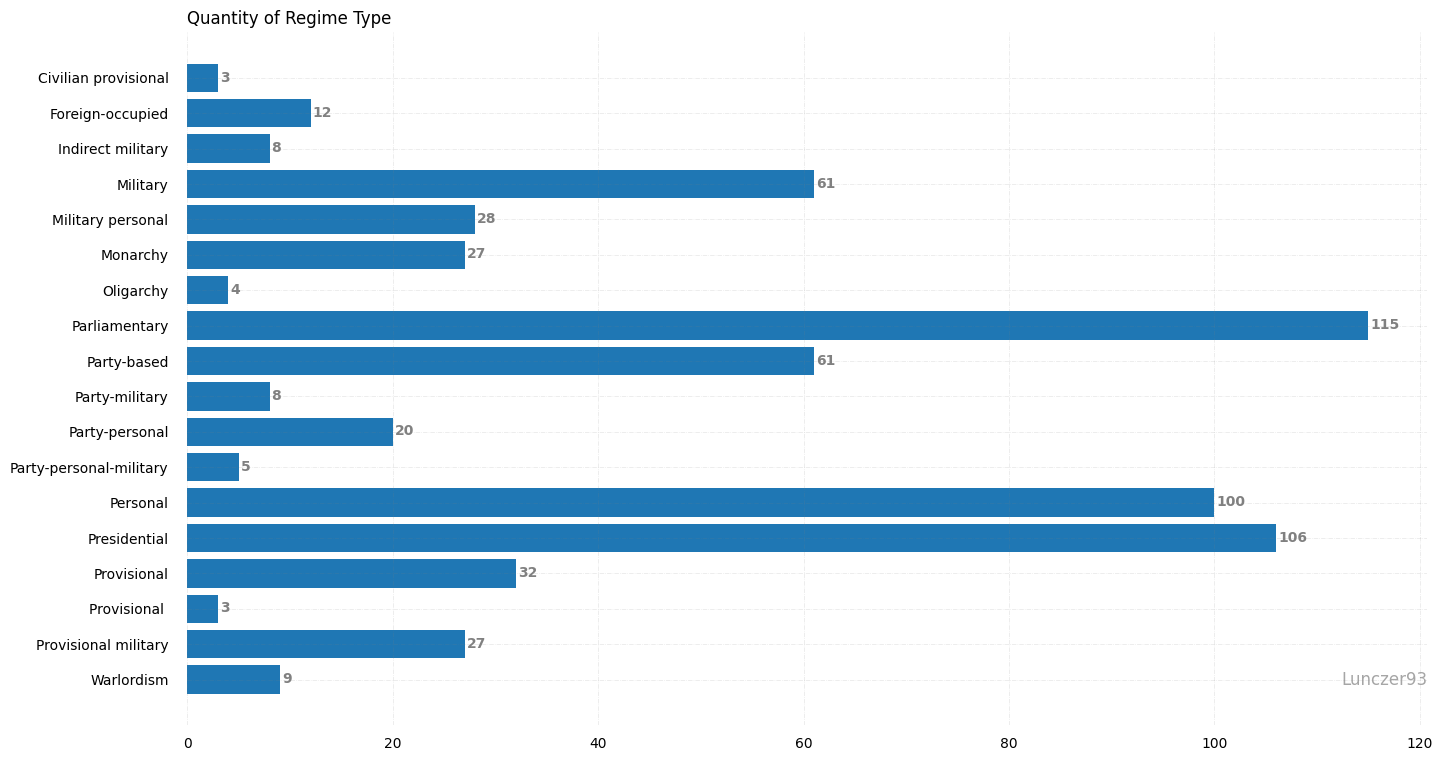

In [83]:
x = RegimeType['Regime Type']
y = RegimeType['Quantity of Regime Types']

fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(x, y)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Quantity of Regime Type',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Lunczer93', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [84]:
dfGovernmentCRY =dfGovernmentModified[['ccode','Country','Regime Type','Years of The Government']]
dfGovernmentCRY

,ccode,Country,Regime Type,Years of The Government
0,2,USA,Presidential,235
1,20,Canada,Parliamentary,92
2,31,Bahamas,Parliamentary,51
3,40,Cuba,Presidential,84
4,40,Cuba,Personal,72
...,...,...,...,...
624,970,Nauru,Parliamentary,56
625,983,Marshall Islands,Presidential,45
626,986,Palau,Presidential,43
627,987,Micronesia,Parliamentary,45


In [85]:
RegimeType = ['Parliamentary','Presidential','Personal']
FiltereddfGovernmentCRY = dfGovernmentCRY.apply(lambda row: row[dfGovernment['Regime Type'].isin(RegimeType)])

In [86]:
FiltereddfGovernmentCRY = FiltereddfGovernmentCRY.sort_values(by=['Regime Type','Years of The Government'], ascending=False)

In [87]:
Top10PresidentialRegime = FiltereddfGovernmentCRY.apply(lambda row: row[dfGovernment['Regime Type']\
                                              .isin(['Presidential'])])\
                                              .nlargest(10,'Years of The Government')
Top10PresidentialRegime

,ccode,Country,Regime Type,Years of The Government
0,2,USA,Presidential,235
143,155,Chile,Presidential,91
3,40,Cuba,Presidential,84
154,165,Uruguay,Presidential,81
49,90,Guatemala,Presidential,79
236,375,Finland,Presidential,79
6,41,Haiti,Presidential,78
123,140,Brazil,Presidential,78
146,160,Argentina,Presidential,78
602,840,Philippines,Presidential,77


In [88]:
Top10ParliamentaryRegime = FiltereddfGovernmentCRY.apply(lambda row: row[dfGovernment['Regime Type']\
                                              .isin(['Parliamentary'])])\
                                              .nlargest(10,'Years of The Government')
Top10ParliamentaryRegime

,ccode,Country,Regime Type,Years of The Government
168,225,Switzerland,Parliamentary,176
161,210,Netherlands,Parliamentary,153
163,212,Luxembourg,Parliamentary,153
239,385,Norway,Parliamentary,139
240,390,Denmark,Parliamentary,123
609,900,Australia,Parliamentary,122
611,920,New Zealand,Parliamentary,116
159,200,UKG,Parliamentary,112
238,380,Sweden,Parliamentary,105
162,211,Belgium,Parliamentary,103


In [89]:
Top10PersonalRegime = FiltereddfGovernmentCRY.apply(lambda row: row[dfGovernment['Regime Type']\
                                              .isin(['Personal'])])\
                                              .nlargest(10,'Years of The Government')
Top10PersonalRegime

,ccode,Country,Regime Type,Years of The Government
173,235,Portugal,Personal,98
24,42,Dominican Rep,Personal,94
80,93,Nicaragua,Personal,87
169,230,Spain,Personal,85
535,732,Korea South,Personal,76
7,41,Haiti,Personal,74
85,95,Panama,Personal,74
605,850,Indonesia,Personal,74
147,160,Argentina,Personal,73
4,40,Cuba,Personal,72


In [90]:
CombineTopRegime = pd.concat([Top10PresidentialRegime,Top10ParliamentaryRegime,Top10PersonalRegime])

In [91]:
CombineTopRegime

,ccode,Country,Regime Type,Years of The Government
0,2,USA,Presidential,235
143,155,Chile,Presidential,91
3,40,Cuba,Presidential,84
154,165,Uruguay,Presidential,81
49,90,Guatemala,Presidential,79
...,...,...,...,...
7,41,Haiti,Personal,74
85,95,Panama,Personal,74
605,850,Indonesia,Personal,74
147,160,Argentina,Personal,73


##### Adding a current person in power

In [92]:
SelecteddfLeaderList = dfLeaderList[['State Abbreviation'
                                     ,'ccode'
                                     ,'Leader'
                                     ,'Date of Term Of Office'
                                     ,'Year of birth','Gender'
                                     ,'Military Career']]

In [93]:
SelecteddfLeaderList['rank'] = SelecteddfLeaderList.groupby('ccode')['Date of Term Of Office'].rank(ascending=False)

C:\Users\dlugo\AppData\Local\Temp\ipykernel_13132\3626852440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SelecteddfLeaderList['rank'] = SelecteddfLeaderList.groupby('ccode')['Date of Term Of Office'].rank(ascending=False)


In [94]:
SelecteddfLeaderList

,State Abbreviation,ccode,Leader,Date of Term Of Office,Year of birth,Gender,Military Career,rank
0,USA,2,Truman,1945-04-12,1884,Male,False,14.0
1,USA,2,Eisenhower,1953-01-20,1890,Male,True,13.0
2,USA,2,Kennedy,1961-01-20,1917,Male,False,12.0
3,USA,2,Johnson,1963-11-22,1908,Male,False,11.0
4,USA,2,Nixon,1969-01-20,1913,Male,False,10.0
...,...,...,...,...,...,...,...,...
2539,WSM,990,Tofilau Eti Alesana,1982-12-31,1924,Male,False,5.0
2540,WSM,990,Va'ai Kolone,1985-12-30,1911,Male,False,4.0
2541,WSM,990,Tofilau Eti Alesana,1988-04-08,1924,Male,False,3.0
2542,WSM,990,Tuilaepa Sailele Malielegaoi,1998-12-23,1945,Male,False,2.0


###### Verifying data

In [95]:
SelecteddfLeaderList.query('ccode== 2')

,State Abbreviation,ccode,Leader,Date of Term Of Office,Year of birth,Gender,Military Career,rank
0,USA,2,Truman,1945-04-12,1884,Male,False,14.0
1,USA,2,Eisenhower,1953-01-20,1890,Male,True,13.0
2,USA,2,Kennedy,1961-01-20,1917,Male,False,12.0
3,USA,2,Johnson,1963-11-22,1908,Male,False,11.0
4,USA,2,Nixon,1969-01-20,1913,Male,False,10.0
5,USA,2,Ford,1974-08-09,1913,Male,False,9.0
6,USA,2,Carter,1977-01-20,1924,Male,False,8.0
7,USA,2,Reagan,1981-01-20,1911,Male,False,7.0
8,USA,2,Bush,1989-01-20,1924,Male,False,6.0
9,USA,2,Clinton,1993-01-20,1946,Male,False,5.0


In [96]:
SelecteddfLeaderList[SelecteddfLeaderList['State Abbreviation'] =='POL']

,State Abbreviation,ccode,Leader,Date of Term Of Office,Year of birth,Gender,Military Career,rank
755,POL,290,Bierut,1944-12-31,1892,Male,False,13.0
756,POL,290,Ochab,1956-03-20,1906,Male,False,12.0
757,POL,290,Gomulka,1956-10-21,1905,Male,False,11.0
758,POL,290,Gierek,1970-12-20,1913,Male,False,10.0
759,POL,290,Kania,1980-09-06,1927,Male,False,9.0
760,POL,290,Jaruzelski,1981-10-18,1923,Male,True,8.0
761,POL,290,Walesa,1990-12-22,1943,Male,False,7.0
762,POL,290,Kwasniewski,1995-12-23,1954,Male,False,6.0
763,POL,290,Kaczynski,2005-12-23,1949,Male,False,5.0
764,POL,290,Komorowski,2010-04-10,1952,Male,False,4.0


In [97]:
SelecteddfLeaderListInPower = SelecteddfLeaderList.query('rank == 1')
SelecteddfLeaderListInPower

,State Abbreviation,ccode,Leader,Date of Term Of Office,Year of birth,Gender,Military Career,rank
13,USA,2,Biden,2021-01-20,1942,Male,False,1.0
26,CAN,20,Trudeau,2015-11-04,1971,Male,False,1.0
34,BHM,31,Hubert Minnis,2017-05-11,1954,Male,False,1.0
38,CUB,40,Raul Castro,2008-02-24,1931,Male,True,1.0
66,HAI,41,Ariel Henry,2021-07-20,1949,Male,False,1.0
...,...,...,...,...,...,...,...,...
2501,NAU,970,Aingimea,2019-08-27,1972,Male,False,1.0
2512,MSI,983,Kabua,2020-01-13,1951,Male,False,1.0
2522,PAL,986,Surangel Whipps Jr.,2021-01-21,1969,Male,False,1.0
2531,FSM,987,Panuelo,2019-05-11,1964,Male,False,1.0


##### Combining dataframes

In [98]:
CombineTopRegime 

,ccode,Country,Regime Type,Years of The Government
0,2,USA,Presidential,235
143,155,Chile,Presidential,91
3,40,Cuba,Presidential,84
154,165,Uruguay,Presidential,81
49,90,Guatemala,Presidential,79
...,...,...,...,...
7,41,Haiti,Personal,74
85,95,Panama,Personal,74
605,850,Indonesia,Personal,74
147,160,Argentina,Personal,73


In [99]:
SelecteddfLeaderListInPower

,State Abbreviation,ccode,Leader,Date of Term Of Office,Year of birth,Gender,Military Career,rank
13,USA,2,Biden,2021-01-20,1942,Male,False,1.0
26,CAN,20,Trudeau,2015-11-04,1971,Male,False,1.0
34,BHM,31,Hubert Minnis,2017-05-11,1954,Male,False,1.0
38,CUB,40,Raul Castro,2008-02-24,1931,Male,True,1.0
66,HAI,41,Ariel Henry,2021-07-20,1949,Male,False,1.0
...,...,...,...,...,...,...,...,...
2501,NAU,970,Aingimea,2019-08-27,1972,Male,False,1.0
2512,MSI,983,Kabua,2020-01-13,1951,Male,False,1.0
2522,PAL,986,Surangel Whipps Jr.,2021-01-21,1969,Male,False,1.0
2531,FSM,987,Panuelo,2019-05-11,1964,Male,False,1.0


In [100]:
CombinedRegimeLeaders = CombineTopRegime.merge(SelecteddfLeaderListInPower, how='left', on='ccode')
CombinedRegimeLeaders

,ccode,Country,Regime Type,Years of The Government,State Abbreviation,Leader,Date of Term Of Office,Year of birth,Gender,Military Career,rank
0,2,USA,Presidential,235,USA,Biden,2021-01-20,1942,Male,False,1.0
1,155,Chile,Presidential,91,CHL,Sebastian Pinera,2018-03-11,1949,Male,False,1.0
2,40,Cuba,Presidential,84,CUB,Raul Castro,2008-02-24,1931,Male,True,1.0
3,165,Uruguay,Presidential,81,URU,Luis Pou,2020-03-01,1973,Male,False,1.0
4,90,Guatemala,Presidential,79,GUA,Giammattei,2020-01-14,1956,Male,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...
25,41,Haiti,Personal,74,HAI,Ariel Henry,2021-07-20,1949,Male,False,1.0
26,95,Panama,Personal,74,PAN,Laurentino Cortizo,2019-07-01,1953,Male,False,1.0
27,850,Indonesia,Personal,74,INS,Joko Widodo,2014-10-20,1961,Male,False,1.0
28,160,Argentina,Personal,73,ARG,Fernandez,2019-12-10,1959,Male,False,1.0


##### Look for oldest and youngest ruler

In [101]:
CombinedRegimeLeaders['Current Year'] = datetime.datetime.now().year

In [102]:
CombinedRegimeLeaders['Age of Leader'] = CombinedRegimeLeaders['Current Year'] -  CombinedRegimeLeaders['Year of birth']

In [103]:
CombinedRegimeLeaders

,ccode,Country,Regime Type,Years of The Government,State Abbreviation,Leader,Date of Term Of Office,Year of birth,Gender,Military Career,rank,Current Year,Age of Leader
0,2,USA,Presidential,235,USA,Biden,2021-01-20,1942,Male,False,1.0,2024,82
1,155,Chile,Presidential,91,CHL,Sebastian Pinera,2018-03-11,1949,Male,False,1.0,2024,75
2,40,Cuba,Presidential,84,CUB,Raul Castro,2008-02-24,1931,Male,True,1.0,2024,93
3,165,Uruguay,Presidential,81,URU,Luis Pou,2020-03-01,1973,Male,False,1.0,2024,51
4,90,Guatemala,Presidential,79,GUA,Giammattei,2020-01-14,1956,Male,False,1.0,2024,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,41,Haiti,Personal,74,HAI,Ariel Henry,2021-07-20,1949,Male,False,1.0,2024,75
26,95,Panama,Personal,74,PAN,Laurentino Cortizo,2019-07-01,1953,Male,False,1.0,2024,71
27,850,Indonesia,Personal,74,INS,Joko Widodo,2014-10-20,1961,Male,False,1.0,2024,63
28,160,Argentina,Personal,73,ARG,Fernandez,2019-12-10,1959,Male,False,1.0,2024,65


In [104]:
AgeOfLeader = CombinedRegimeLeaders[['Country','Leader','Age of Leader']]
AgeOfLeader

,Country,Leader,Age of Leader
0,USA,Biden,82
1,Chile,Sebastian Pinera,75
2,Cuba,Raul Castro,93
3,Uruguay,Luis Pou,51
4,Guatemala,Giammattei,68
...,...,...,...
25,Haiti,Ariel Henry,75
26,Panama,Laurentino Cortizo,71
27,Indonesia,Joko Widodo,63
28,Argentina,Fernandez,65


In [105]:
print(AgeOfLeader.max())

Country           Uruguay
Leader           de Sousa
Age of Leader          93
dtype: object


In [106]:
print(AgeOfLeader.min())

Country                  Argentina
Leader           Alexander De Croo
Age of Leader                   39
dtype: object


##### Visualisation of Gender and Military Career

In [107]:
LeaderOfGender = CombinedRegimeLeaders.groupby(['Gender'])['Gender'].count().to_frame()
LeaderOfGender.rename(columns = {'Gender':'Quantity of Gender'}, inplace=True)
LeaderOfGender.reset_index(inplace=True)
LeaderOfGender

,Gender,Quantity of Gender
0,Female,4
1,Male,26


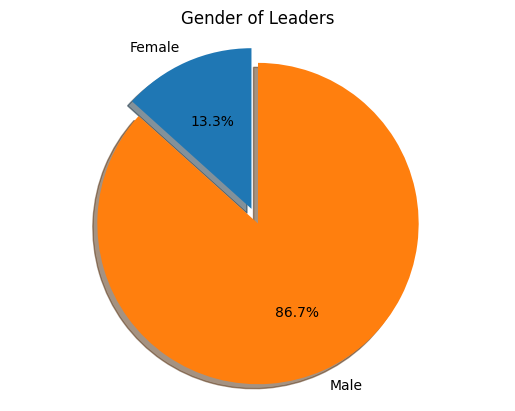

In [108]:
labels = LeaderOfGender['Gender']  
sizes = LeaderOfGender['Quantity of Gender'] 
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Gender of Leaders")

plt.show()

In [109]:
MilitaryCareerLeaders = CombinedRegimeLeaders.groupby(['Military Career'])['Military Career'].count().to_frame()
MilitaryCareerLeaders.rename(columns = {'Military Career':'Quantity of Military Career'}, inplace=True)
MilitaryCareerLeaders.reset_index(inplace=True)
MilitaryCareerLeaders

,Military Career,Quantity of Military Career
0,False,27
1,True,3


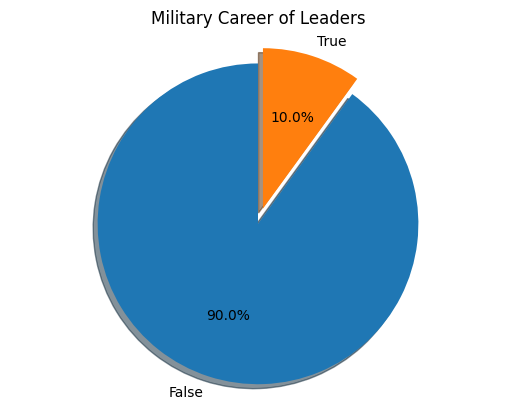

In [110]:
labels = MilitaryCareerLeaders['Military Career']  
sizes = MilitaryCareerLeaders['Quantity of Military Career'] 
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Military Career of Leaders")

plt.show()

##### Summary

In [111]:
dfGovernment

,ccode,Country,Government Start,Government End,Regime Type,Years of The Government
0,2,USA,1789-03-04,2020-12-31,Presidential,235.0
1,20,Canada,1931-12-11,2020-12-31,Parliamentary,92.0
2,31,Bahamas,1973-06-30,2020-12-31,Parliamentary,51.0
3,40,Cuba,1940-10-10,1952-03-10,Presidential,84.0
4,40,Cuba,1952-03-10,1959-01-01,Personal,72.0
...,...,...,...,...,...,...
624,970,Nauru,1968-01-31,2020-12-31,Parliamentary,56.0
625,983,Marshall Islands,1979-10-01,2020-12-31,Presidential,45.0
626,986,Palau,1981-01-01,2020-12-31,Presidential,43.0
627,987,Micronesia,1979-05-11,2020-12-31,Parliamentary,45.0


In [112]:
dfLeaderList

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result
0,USA,2,A2.9-46,Truman,12,4,1945,1945-04-12,1,1953,1953-01-01,1884,Male,False,11,1948,1948-11-01
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1953-01-20,1,1961,1961-01-01,1890,Male,True,11,1952,1952-11-01
2,USA,2,A2.9-52,Kennedy,20,1,1961,1961-01-20,11,1963,1963-11-01,1917,Male,False,11,1960,1960-11-01
3,USA,2,A2.9-55,Johnson,22,11,1963,1963-11-22,1,1969,1969-01-01,1908,Male,False,11,1964,1964-11-01
4,USA,2,A2.9-58,Nixon,20,1,1969,1969-01-20,8,1974,1974-08-01,1913,Male,False,11,1968,1968-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,WSM,990,kb-800-8,Tofilau Eti Alesana,31,12,1982,1982-12-31,12,1985,1985-12-01,1924,Male,False,2,1985,1985-02-01
2540,WSM,990,kb-800-9,Va'ai Kolone,30,12,1985,1985-12-30,4,1988,1988-04-01,1911,Male,False,0,0,NaT
2541,WSM,990,kb-810-1,Tofilau Eti Alesana,8,4,1988,1988-04-08,12,1998,1998-12-01,1924,Male,False,0,0,NaT
2542,WSM,990,kb-810-2,Tuilaepa Sailele Malielegaoi,23,12,1998,1998-12-23,7,2021,2021-07-01,1945,Male,False,7,1998,1998-07-01


In [113]:
dfResultElectionList

,ccode,Election Number,Country,Election Year,Election Month,Election Day,Date of Election,Sequence,Event,Election Number,Type,Direct,Regular,Victory,Change,Runoff Election
0,700,1,Afghanistan,1987,11,1,1987-11-01,1,Announced,700001,L,Y,N,Y,N,N
1,700,1,Afghanistan,1988,4,6,1988-04-06,2,"Vote, Early",700001,L,Y,N,Y,N,N
2,700,2,Afghanistan,2004,7,1,2004-07-01,1,Deadline Not Met,700002,X,Y,N,Not Available,Not Available,N
3,700,3,Afghanistan,2004,7,1,2004-07-01,1,Announced,700003,X,Y,N,Y,N,N
4,700,3,Afghanistan,2004,10,9,2004-10-09,2,"Vote, Early",700003,X,Y,N,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,552,12,Zimbabwe,2008,3,29,2008-03-29,1,"Vote, As Scheduled",552012,X,Y,Y,Not Available,Not Available,1
4364,552,13,Zimbabwe,2008,3,29,2008-03-29,1,Announced,552013,X,Y,Y,Y,N,2
4365,552,13,Zimbabwe,2008,6,27,2008-06-27,2,"Vote, Early",552013,X,Y,Y,Y,N,2
4366,552,14,Zimbabwe,2013,7,31,2013-07-31,1,"Vote, As Scheduled",552014,X,Y,Y,Y,N,N


##### Analysis of Female Leaders

In [114]:
FemaleLeaderList = dfLeaderList.loc[(dfLeaderList["Gender"] =='Female')]

In [115]:
FemaleLeaderList

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result
22,CAN,20,A2.9-145,Kim Campbell,25,6,1993,1993-06-25,11,1993,1993-11-01,1947,Female,False,0,0,NaT
30,BHM,31,A3.0-3,Pratt,4,5,2005,2005-05-04,6,2005,2005-06-01,1945,Female,False,0,0,NaT
53,HAI,41,A2.9-325,Pascal-Troillet,13,3,1990,1990-03-13,2,1991,1991-02-01,1943,Female,False,0,0,NaT
94,JAM,51,A3.0-8,Simpson Miller,30,3,2006,2006-03-30,9,2007,2007-09-01,1945,Female,False,0,0,NaT
97,JAM,51,cb-51-1,Simpson Miller,5,1,2012,2012-01-05,3,2016,2016-03-01,1945,Female,False,12,2011,2011-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,NEW,920,A2.9-9064,Shipley,8,12,1997,1997-12-08,12,1999,1999-12-01,1952,Female,False,0,0,NaT
2389,NEW,920,A2.9-9067,Clark,10,12,1999,1999-12-10,11,2008,2008-11-01,1950,Female,False,11,1999,1999-11-01
2392,NEW,920,se-920-2,Jacinda Ardern,26,10,2017,2017-10-26,0,0,NaT,1980,Female,False,9,2017,2017-09-01
2511,MSI,983,cb-983-10,Hilda Heine,28,1,2016,2016-01-28,1,2020,2020-01-01,1951,Female,False,0,0,NaT


##### Verifying if it is appropriate

In [116]:
FemaleLeaderList.query("Gender == 'Female'")

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result
22,CAN,20,A2.9-145,Kim Campbell,25,6,1993,1993-06-25,11,1993,1993-11-01,1947,Female,False,0,0,NaT
30,BHM,31,A3.0-3,Pratt,4,5,2005,2005-05-04,6,2005,2005-06-01,1945,Female,False,0,0,NaT
53,HAI,41,A2.9-325,Pascal-Troillet,13,3,1990,1990-03-13,2,1991,1991-02-01,1943,Female,False,0,0,NaT
94,JAM,51,A3.0-8,Simpson Miller,30,3,2006,2006-03-30,9,2007,2007-09-01,1945,Female,False,0,0,NaT
97,JAM,51,cb-51-1,Simpson Miller,5,1,2012,2012-01-05,3,2016,2016-03-01,1945,Female,False,12,2011,2011-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,NEW,920,A2.9-9064,Shipley,8,12,1997,1997-12-08,12,1999,1999-12-01,1952,Female,False,0,0,NaT
2389,NEW,920,A2.9-9067,Clark,10,12,1999,1999-12-10,11,2008,2008-11-01,1950,Female,False,11,1999,1999-11-01
2392,NEW,920,se-920-2,Jacinda Ardern,26,10,2017,2017-10-26,0,0,NaT,1980,Female,False,9,2017,2017-09-01
2511,MSI,983,cb-983-10,Hilda Heine,28,1,2016,2016-01-28,1,2020,2020-01-01,1951,Female,False,0,0,NaT


In [117]:
FemaleLeaderList.query("Gender == 'Male'")

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result


##### Looking for Female Leaders with Military Career:

In [118]:
FemaleLeaderList[FemaleLeaderList['Military Career'] == True]

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result


##### Iterating over rows regarding Name and Gender

In [119]:
print("\nIterating over row :\n")


for index, row in FemaleLeaderList.iterrows():
    print(row["Leader"],row["Gender"])


Iterating over row :

Kim Campbell Female
Pratt Female
Pascal-Troillet Female
Simpson Miller Female
Simpson Miller Female
Persad-Bissessar Female
Mia Mottley Female
Eugenia Charles Female
Violeta Chamorro Female
Miranda Female
Mireya Moscoso Female
Janet Jagan Female
Rousseff Female
Gueiler Tejada Female
Anez Female
Michelle Bachelet Female
Michelle Bachelet Female
Peron, Isabel Female
Fernandez de Kirchner Female
Thatcher Female
May Female
Sophie Wilmes Female
Dreifuss Female
Calmy-Rey Female
Doris Leuthard Female
Calmy-Rey Female
Widmer-Schlumpf Female
Sommaruga Female
Doris Leuthard Female
Sommaruga Female
Merkel Female
Bierlein Female
Radicova Female
Radmila Sekerinska Female
Radmila Sekerinska Female
Kosor Female
Ana Brnabic Female
Alenka Bratusek Female
Thanou Female
Indzhova Female
Greceanii Female
Natalia Gherman Female
Maia Sandu Female
Maia Sandu Female
Kaja Kallas Female
Straujuma Female
Grybauskaite Female
Burdjanadze Female
Burdzhanadze Female
Jaatteenmaki Female
Kiviniem

##### Iterating over rows regarding Name,Year Of Brith, State Abbreviation, Gender, Military Career

In [120]:
print("\nIterating over rows using apply function :\n")

print(FemaleLeaderList.apply(lambda row: row["State Abbreviation"] + " " +
                             row["Leader"] + " " + 
                             str(row["Year of birth"]) + " " + 
                             row["Gender"] + " " +
                             str(row["Military Career"])  
                             ,axis=1))


Iterating over rows using apply function :

22              CAN Kim Campbell 1947 Female False
30                     BHM Pratt 1945 Female False
53           HAI Pascal-Troillet 1943 Female False
94            JAM Simpson Miller 1945 Female False
97            JAM Simpson Miller 1945 Female False
                           ...                    
2388                 NEW Shipley 1952 Female False
2389                   NEW Clark 1950 Female False
2392          NEW Jacinda Ardern 1980 Female False
2511             MSI Hilda Heine 1951 Female False
2543    WSM Fiame Naomi Mata'afa 1957 Female False
Length: 96, dtype: object


##### Looking for youngest and oldest rulers

In [121]:
FemaleLeaderList

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result
22,CAN,20,A2.9-145,Kim Campbell,25,6,1993,1993-06-25,11,1993,1993-11-01,1947,Female,False,0,0,NaT
30,BHM,31,A3.0-3,Pratt,4,5,2005,2005-05-04,6,2005,2005-06-01,1945,Female,False,0,0,NaT
53,HAI,41,A2.9-325,Pascal-Troillet,13,3,1990,1990-03-13,2,1991,1991-02-01,1943,Female,False,0,0,NaT
94,JAM,51,A3.0-8,Simpson Miller,30,3,2006,2006-03-30,9,2007,2007-09-01,1945,Female,False,0,0,NaT
97,JAM,51,cb-51-1,Simpson Miller,5,1,2012,2012-01-05,3,2016,2016-03-01,1945,Female,False,12,2011,2011-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,NEW,920,A2.9-9064,Shipley,8,12,1997,1997-12-08,12,1999,1999-12-01,1952,Female,False,0,0,NaT
2389,NEW,920,A2.9-9067,Clark,10,12,1999,1999-12-10,11,2008,2008-11-01,1950,Female,False,11,1999,1999-11-01
2392,NEW,920,se-920-2,Jacinda Ardern,26,10,2017,2017-10-26,0,0,NaT,1980,Female,False,9,2017,2017-09-01
2511,MSI,983,cb-983-10,Hilda Heine,28,1,2016,2016-01-28,1,2020,2020-01-01,1951,Female,False,0,0,NaT


In [122]:
YoungFemaleLeader = FemaleLeaderList[FemaleLeaderList['Year of birth'] ==FemaleLeaderList['Year of birth'].max()]
YoungestFemaleLeader = YoungFemaleLeader[['State Abbreviation','Leader','Year of birth']]
YoungestFemaleLeader

,State Abbreviation,Leader,Year of birth
1343,FIN,Sanna Marin,1985


In [123]:
OldFemaleLeader = FemaleLeaderList[FemaleLeaderList['Year of birth'] ==FemaleLeaderList['Year of birth'].min()]
OldestFemaleLeader = OldFemaleLeader[['State Abbreviation','Leader','Year of birth']]
OldestFemaleLeader

,State Abbreviation,Leader,Year of birth
1935,ISR,Meir,1898


In [124]:
CombinedYoungestOldestLeader = pd.concat([OldestFemaleLeader,YoungestFemaleLeader] )
CombinedYoungestOldestLeader
CombinedYoungestOldestLeader['Current Year'] = datetime.datetime.now().year
CombinedYoungestOldestLeader['Age'] = (CombinedYoungestOldestLeader['Current Year'] - 
                                       CombinedYoungestOldestLeader['Year of birth'])
CombinedYoungestOldestLeader.drop(['Year of birth','Current Year'],axis=1, inplace=True)

In [125]:
CombinedYoungestOldestLeader

,State Abbreviation,Leader,Age
1935,ISR,Meir,126
1343,FIN,Sanna Marin,39


##### Analysis of Male Leaders

In [126]:
MaleLeaderList = dfLeaderList.loc[(dfLeaderList["Gender"] =='Male')]

In [127]:
MaleLeaderList

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result
0,USA,2,A2.9-46,Truman,12,4,1945,1945-04-12,1,1953,1953-01-01,1884,Male,False,11,1948,1948-11-01
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1953-01-20,1,1961,1961-01-01,1890,Male,True,11,1952,1952-11-01
2,USA,2,A2.9-52,Kennedy,20,1,1961,1961-01-20,11,1963,1963-11-01,1917,Male,False,11,1960,1960-11-01
3,USA,2,A2.9-55,Johnson,22,11,1963,1963-11-22,1,1969,1969-01-01,1908,Male,False,11,1964,1964-11-01
4,USA,2,A2.9-58,Nixon,20,1,1969,1969-01-20,8,1974,1974-08-01,1913,Male,False,11,1968,1968-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,WSM,990,kb-800-7,Taisi Tufuga Efi,18,9,1982,1982-09-18,12,1982,1982-12-01,1938,Male,False,0,0,NaT
2539,WSM,990,kb-800-8,Tofilau Eti Alesana,31,12,1982,1982-12-31,12,1985,1985-12-01,1924,Male,False,2,1985,1985-02-01
2540,WSM,990,kb-800-9,Va'ai Kolone,30,12,1985,1985-12-30,4,1988,1988-04-01,1911,Male,False,0,0,NaT
2541,WSM,990,kb-810-1,Tofilau Eti Alesana,8,4,1988,1988-04-08,12,1998,1998-12-01,1924,Male,False,0,0,NaT


In [128]:
YoungMaleLeaderList = MaleLeaderList[MaleLeaderList['Year of birth'] ==MaleLeaderList['Year of birth'].max()]
YoungestMaleLeaderList = YoungMaleLeaderList[['State Abbreviation','Leader','Year of birth']]
YoungestMaleLeaderList.drop_duplicates(inplace=True)
YoungestMaleLeaderList

C:\Users\dlugo\AppData\Local\Temp\ipykernel_13132\4205784033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YoungestMaleLeaderList.drop_duplicates(inplace=True)


,State Abbreviation,Leader,Year of birth
781,AUS,Kurz,1986


In [129]:
MaleLeaderList = MaleLeaderList[MaleLeaderList["Year of birth"] != 0]

In [130]:
OldMaleLeaderList = MaleLeaderList[MaleLeaderList['Year of birth'] ==MaleLeaderList['Year of birth'].min()]
OldestMaleLeaderList = OldMaleLeaderList[['State Abbreviation','Leader','Year of birth']]
OldestMaleLeaderList

,State Abbreviation,Leader,Year of birth
1704,SAF,Strijdom,1873


In [131]:
CombinedOldestYoungestLeader = pd.concat([OldestMaleLeaderList,YoungestMaleLeaderList] )
CombinedOldestYoungestLeader
CombinedOldestYoungestLeader['Current Year'] = datetime.datetime.now().year
CombinedOldestYoungestLeader['Age'] = (CombinedOldestYoungestLeader['Current Year'] - 
                                       CombinedOldestYoungestLeader['Year of birth'])
CombinedOldestYoungestLeader.drop(['Year of birth','Current Year'],axis=1, inplace=True)
CombinedOldestYoungestLeader

,State Abbreviation,Leader,Age
1704,SAF,Strijdom,151
781,AUS,Kurz,38


##### Analysis of Female and Male:

In [132]:
dfLeaderList

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result
0,USA,2,A2.9-46,Truman,12,4,1945,1945-04-12,1,1953,1953-01-01,1884,Male,False,11,1948,1948-11-01
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1953-01-20,1,1961,1961-01-01,1890,Male,True,11,1952,1952-11-01
2,USA,2,A2.9-52,Kennedy,20,1,1961,1961-01-20,11,1963,1963-11-01,1917,Male,False,11,1960,1960-11-01
3,USA,2,A2.9-55,Johnson,22,11,1963,1963-11-22,1,1969,1969-01-01,1908,Male,False,11,1964,1964-11-01
4,USA,2,A2.9-58,Nixon,20,1,1969,1969-01-20,8,1974,1974-08-01,1913,Male,False,11,1968,1968-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,WSM,990,kb-800-8,Tofilau Eti Alesana,31,12,1982,1982-12-31,12,1985,1985-12-01,1924,Male,False,2,1985,1985-02-01
2540,WSM,990,kb-800-9,Va'ai Kolone,30,12,1985,1985-12-30,4,1988,1988-04-01,1911,Male,False,0,0,NaT
2541,WSM,990,kb-810-1,Tofilau Eti Alesana,8,4,1988,1988-04-08,12,1998,1998-12-01,1924,Male,False,0,0,NaT
2542,WSM,990,kb-810-2,Tuilaepa Sailele Malielegaoi,23,12,1998,1998-12-23,7,2021,2021-07-01,1945,Male,False,7,1998,1998-07-01


In [133]:
dfLeaderListGender = dfLeaderList[["Leader","Gender"]]
VisdfLeaderListGender =dfLeaderListGender.groupby("Gender").count().reset_index()
VisdfLeaderListGender

,Gender,Leader
0,Female,96
1,Male,2303


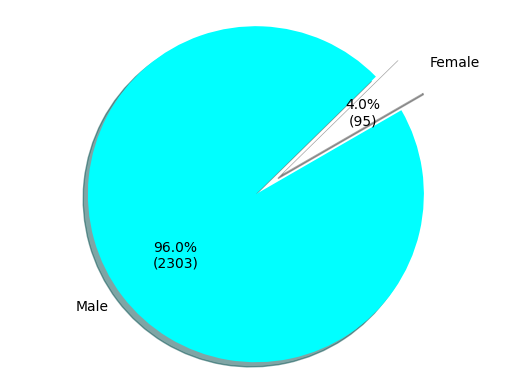

In [134]:
x = VisdfLeaderListGender['Gender']
y = VisdfLeaderListGender['Leader']

explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = ("white", "cyan")

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig1, ax1 = plt.subplots()

ax1.pie(y,
        explode=explode,
        labels=x, 
        autopct = lambda pct: func(pct, y),
        shadow=True, 
        colors=colors,
        startangle=30)


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()


##### Analysis of  Male and Military Career and viualise it:

In [135]:
LeadersMilitaryCareer = dfLeaderList[['Military Career']]
QuantityLeadersMilitaryCareer =LeadersMilitaryCareer.groupby(['Military Career'])['Military Career'].count().to_frame()
QuantityLeadersMilitaryCareer.rename(columns = {'Military Career':'Quantity of Military Career'}, inplace=True)
QuantityLeadersMilitaryCareer.reset_index(inplace=True)
QuantityLeadersMilitaryCareer

,Military Career,Quantity of Military Career
0,False,2171
1,True,373


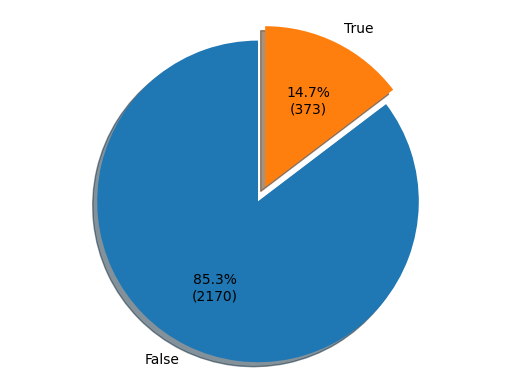

In [136]:
x = QuantityLeadersMilitaryCareer['Quantity of Military Career']
y = QuantityLeadersMilitaryCareer['Military Career']


explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig1, ax1 = plt.subplots()
ax1.pie(x, 
        explode=explode,
        labels=y,
        autopct = lambda pct: func(pct, x),
        shadow=True, 
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

###### Iterating over POL and USA Leaders

##### POLAND

In [137]:
dfLeaderListPOL = dfLeaderList[dfLeaderList['State Abbreviation']=='POL']
dfLeaderListPOL

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result
755,POL,290,A2.9-4414,Bierut,31,12,1944,1944-12-31,3,1956,1956-03-01,1892,Male,False,1,1947,1947-01-01
756,POL,290,A2.9-4417,Ochab,20,3,1956,1956-03-20,10,1956,1956-10-01,1906,Male,False,0,0,NaT
757,POL,290,A2.9-4420,Gomulka,21,10,1956,1956-10-21,12,1970,1970-12-01,1905,Male,False,1,1957,1957-01-01
758,POL,290,A2.9-4423,Gierek,20,12,1970,1970-12-20,9,1980,1980-09-01,1913,Male,False,3,1972,1972-03-01
759,POL,290,A2.9-4426,Kania,6,9,1980,1980-09-06,10,1981,1981-10-01,1927,Male,False,0,0,NaT
760,POL,290,A2.9-4429,Jaruzelski,18,10,1981,1981-10-18,12,1990,1990-12-01,1923,Male,True,10,1985,1985-10-01
761,POL,290,A2.9-4432,Walesa,22,12,1990,1990-12-22,12,1995,1995-12-01,1943,Male,False,12,1990,1990-12-01
762,POL,290,A2.9-4435,Kwasniewski,23,12,1995,1995-12-23,12,2005,2005-12-01,1954,Male,False,11,1995,1995-11-01
763,POL,290,A3.0-60,Kaczynski,23,12,2005,2005-12-23,4,2010,2010-04-01,1949,Male,False,10,2005,2005-10-01
764,POL,290,A3.0-61,Komorowski,10,4,2010,2010-04-10,7,2010,2010-07-01,1952,Male,False,0,0,NaT


In [138]:
dfLeaderListPOLSelCol = dfLeaderListPOL[['Leader',
                                         'Year of birth',
                                         'Gender',
                                         'Military Career',
                                         'Date of Term Of Office',
                                         'Date of End of Term of Office']]
dfLeaderListPOLSelCol

,Leader,Year of birth,Gender,Military Career,Date of Term Of Office,Date of End of Term of Office
755,Bierut,1892,Male,False,1944-12-31,1956-03-01
756,Ochab,1906,Male,False,1956-03-20,1956-10-01
757,Gomulka,1905,Male,False,1956-10-21,1970-12-01
758,Gierek,1913,Male,False,1970-12-20,1980-09-01
759,Kania,1927,Male,False,1980-09-06,1981-10-01
760,Jaruzelski,1923,Male,True,1981-10-18,1990-12-01
761,Walesa,1943,Male,False,1990-12-22,1995-12-01
762,Kwasniewski,1954,Male,False,1995-12-23,2005-12-01
763,Kaczynski,1949,Male,False,2005-12-23,2010-04-01
764,Komorowski,1952,Male,False,2010-04-10,2010-07-01


In [139]:
for i, j in dfLeaderListPOLSelCol.iterrows():
    print(i,j)
    print()

755 Leader                                        Bierut
Year of birth                                   1892
Gender                                          Male
Military Career                                False
Date of Term Of Office           1944-12-31 00:00:00
Date of End of Term of Office    1956-03-01 00:00:00
Name: 755, dtype: object

756 Leader                                         Ochab
Year of birth                                   1906
Gender                                          Male
Military Career                                False
Date of Term Of Office           1956-03-20 00:00:00
Date of End of Term of Office    1956-10-01 00:00:00
Name: 756, dtype: object

757 Leader                                       Gomulka
Year of birth                                   1905
Gender                                          Male
Military Career                                False
Date of Term Of Office           1956-10-21 00:00:00
Date of End of Term of Office    19

##### USA

In [140]:
dfLeaderListUSA = dfLeaderList[dfLeaderList['State Abbreviation']=='USA']
dfLeaderListUSA

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result
0,USA,2,A2.9-46,Truman,12,4,1945,1945-04-12,1,1953,1953-01-01,1884,Male,False,11,1948,1948-11-01
1,USA,2,A2.9-49,Eisenhower,20,1,1953,1953-01-20,1,1961,1961-01-01,1890,Male,True,11,1952,1952-11-01
2,USA,2,A2.9-52,Kennedy,20,1,1961,1961-01-20,11,1963,1963-11-01,1917,Male,False,11,1960,1960-11-01
3,USA,2,A2.9-55,Johnson,22,11,1963,1963-11-22,1,1969,1969-01-01,1908,Male,False,11,1964,1964-11-01
4,USA,2,A2.9-58,Nixon,20,1,1969,1969-01-20,8,1974,1974-08-01,1913,Male,False,11,1968,1968-11-01
5,USA,2,A2.9-61,Ford,9,8,1974,1974-08-09,1,1977,1977-01-01,1913,Male,False,0,0,NaT
6,USA,2,A2.9-64,Carter,20,1,1977,1977-01-20,1,1981,1981-01-01,1924,Male,False,11,1976,1976-11-01
7,USA,2,A2.9-67,Reagan,20,1,1981,1981-01-20,1,1989,1989-01-01,1911,Male,False,11,1980,1980-11-01
8,USA,2,A2.9-70,Bush,20,1,1989,1989-01-20,1,1993,1993-01-01,1924,Male,False,11,1988,1988-11-01
9,USA,2,A2.9-73,Clinton,20,1,1993,1993-01-20,1,2001,2001-01-01,1946,Male,False,11,1992,1992-11-01


In [141]:
dfLeaderListUSASelCol = dfLeaderListUSA[['Leader',
                                         'Year of birth',
                                         'Gender',
                                         'Military Career',
                                         'Date of Term Of Office',
                                         'Date of End of Term of Office']]
dfLeaderListUSASelCol

,Leader,Year of birth,Gender,Military Career,Date of Term Of Office,Date of End of Term of Office
0,Truman,1884,Male,False,1945-04-12,1953-01-01
1,Eisenhower,1890,Male,True,1953-01-20,1961-01-01
2,Kennedy,1917,Male,False,1961-01-20,1963-11-01
3,Johnson,1908,Male,False,1963-11-22,1969-01-01
4,Nixon,1913,Male,False,1969-01-20,1974-08-01
5,Ford,1913,Male,False,1974-08-09,1977-01-01
6,Carter,1924,Male,False,1977-01-20,1981-01-01
7,Reagan,1911,Male,False,1981-01-20,1989-01-01
8,Bush,1924,Male,False,1989-01-20,1993-01-01
9,Clinton,1946,Male,False,1993-01-20,2001-01-01


In [142]:
for i in dfLeaderListUSASelCol.itertuples():
    print(i)

Pandas(Index=0, Leader='Truman', _2=1884, Gender='Male', _4=False, _5=Timestamp('1945-04-12 00:00:00'), _6=Timestamp('1953-01-01 00:00:00'))
Pandas(Index=1, Leader='Eisenhower', _2=1890, Gender='Male', _4=True, _5=Timestamp('1953-01-20 00:00:00'), _6=Timestamp('1961-01-01 00:00:00'))
Pandas(Index=2, Leader='Kennedy', _2=1917, Gender='Male', _4=False, _5=Timestamp('1961-01-20 00:00:00'), _6=Timestamp('1963-11-01 00:00:00'))
Pandas(Index=3, Leader='Johnson', _2=1908, Gender='Male', _4=False, _5=Timestamp('1963-11-22 00:00:00'), _6=Timestamp('1969-01-01 00:00:00'))
Pandas(Index=4, Leader='Nixon', _2=1913, Gender='Male', _4=False, _5=Timestamp('1969-01-20 00:00:00'), _6=Timestamp('1974-08-01 00:00:00'))
Pandas(Index=5, Leader='Ford', _2=1913, Gender='Male', _4=False, _5=Timestamp('1974-08-09 00:00:00'), _6=Timestamp('1977-01-01 00:00:00'))
Pandas(Index=6, Leader='Carter', _2=1924, Gender='Male', _4=False, _5=Timestamp('1977-01-20 00:00:00'), _6=Timestamp('1981-01-01 00:00:00'))
Pandas(Inde

##### Filtering thirteenth records:

In [143]:
#Creating a list of dataframe columns
columns = list(dfLeaderListUSASelCol)
for i in columns:
    print(dfLeaderListUSASelCol[i][13])

Biden
1942
Male
False
2021-01-20 00:00:00
NaT


##### France

##### Looking for the abbreviation of country

In [144]:
sub= 'F'
dfLeaderList[dfLeaderList['State Abbreviation'].str.match(sub)]


,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result
612,FRN,220,A2.9-3553,Bidault,28,10,1949,1949-10-28,6,1950,1950-06-01,1899,Male,False,0,0,NaT
613,FRN,220,A2.9-3556,Queuille,2,7,1950,1950-07-02,7,1950,1950-07-01,1884,Male,False,0,0,NaT
614,FRN,220,A2.9-3559,Pleven,12,7,1950,1950-07-12,2,1951,1951-02-01,1901,Male,False,0,0,NaT
615,FRN,220,A2.9-3562,Queuille,9,3,1951,1951-03-09,7,1951,1951-07-01,1884,Male,False,0,0,NaT
616,FRN,220,A2.9-3565,Pleven,8,8,1951,1951-08-08,1,1952,1952-01-01,1901,Male,False,6,1951,1951-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,FSM,987,kb-987-5,Falcam,11,5,1999,1999-05-11,5,2003,2003-05-01,1935,Male,False,0,0,NaT
2528,FSM,987,kb-987-6,Urusemal,11,5,2003,2003-05-11,5,2007,2007-05-01,1952,Male,False,0,0,NaT
2529,FSM,987,kb-987-7,Mori,11,5,2007,2007-05-11,5,2015,2015-05-01,1948,Male,False,0,0,NaT
2530,FSM,987,kb-987-8,Christian,11,5,2015,2015-05-11,5,2019,2019-05-01,1947,Male,False,0,0,NaT


In [145]:
dfLeaderListFRA = dfLeaderList[dfLeaderList['State Abbreviation']=='FRN']
dfLeaderListFRA

,State Abbreviation,ccode,Lead Id,Leader,Day of Start of Term of Office,Month of Start of Term of Office,Year of Start of Term of Office,Date of Term Of Office,Month of End of Term of Office,Year of End of Term of Office,Date of End of Term of Office,Year of birth,Gender,Military Career,Month of Election or Re-election Result,Year of Election or Re-election Result,Date of Election or Re-election Result
612,FRN,220,A2.9-3553,Bidault,28,10,1949,1949-10-28,6,1950,1950-06-01,1899,Male,False,0,0,NaT
613,FRN,220,A2.9-3556,Queuille,2,7,1950,1950-07-02,7,1950,1950-07-01,1884,Male,False,0,0,NaT
614,FRN,220,A2.9-3559,Pleven,12,7,1950,1950-07-12,2,1951,1951-02-01,1901,Male,False,0,0,NaT
615,FRN,220,A2.9-3562,Queuille,9,3,1951,1951-03-09,7,1951,1951-07-01,1884,Male,False,0,0,NaT
616,FRN,220,A2.9-3565,Pleven,8,8,1951,1951-08-08,1,1952,1952-01-01,1901,Male,False,6,1951,1951-06-01
617,FRN,220,A2.9-3568,Faure,18,1,1952,1952-01-18,2,1952,1952-02-01,1908,Male,False,0,0,NaT
618,FRN,220,A2.9-3571,Pinay,7,3,1952,1952-03-07,12,1952,1952-12-01,1891,Male,True,0,0,NaT
619,FRN,220,A2.9-3574,Mayer,7,1,1953,1953-01-07,5,1953,1953-05-01,1895,Male,True,0,0,NaT
620,FRN,220,A2.9-3577,Laniel,26,6,1953,1953-06-26,6,1954,1954-06-01,1889,Male,False,0,0,NaT
621,FRN,220,A2.9-3580,Mendes-France,18,6,1954,1954-06-18,2,1955,1955-02-01,1907,Male,False,0,0,NaT


In [146]:
dfLeaderListFRAColSel = dfLeaderListFRA[['State Abbreviation',
                                        'Leader',
                                        'Date of Term Of Office',
                                        'Date of End of Term of Office',
                                         'Year of birth',
                                         'Gender',
                                         'Military Career'
                                        ]]
dfLeaderListFRAColSel

,State Abbreviation,Leader,Date of Term Of Office,Date of End of Term of Office,Year of birth,Gender,Military Career
612,FRN,Bidault,1949-10-28,1950-06-01,1899,Male,False
613,FRN,Queuille,1950-07-02,1950-07-01,1884,Male,False
614,FRN,Pleven,1950-07-12,1951-02-01,1901,Male,False
615,FRN,Queuille,1951-03-09,1951-07-01,1884,Male,False
616,FRN,Pleven,1951-08-08,1952-01-01,1901,Male,False
617,FRN,Faure,1952-01-18,1952-02-01,1908,Male,False
618,FRN,Pinay,1952-03-07,1952-12-01,1891,Male,True
619,FRN,Mayer,1953-01-07,1953-05-01,1895,Male,True
620,FRN,Laniel,1953-06-26,1954-06-01,1889,Male,False
621,FRN,Mendes-France,1954-06-18,1955-02-01,1907,Male,False


In [147]:
#Iterating over columns name
for column in dfLeaderListFRAColSel:

    columnSeriesObj = dfLeaderListFRAColSel[column]
    print('Column Name: ', column)
    print('Column Contents : ', columnSeriesObj.values)

Column Name:  State Abbreviation
Column Contents :  ['FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN'
 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN' 'FRN'
 'FRN']
Column Name:  Leader
Column Contents :  ['Bidault' 'Queuille' 'Pleven' 'Queuille' 'Pleven' 'Faure' 'Pinay' 'Mayer'
 'Laniel' 'Mendes-France' 'Faure' 'Mollet' 'Bourges-Maunory' 'Gaillard'
 'Pflimin' 'De Gaulle' 'Poher' 'Pompidou' 'Poher' "Giscard D'Estaing"
 'Mitterand' 'Chirac' 'Sarkozy' 'Hollande' 'Macron']
Column Name:  Date of Term Of Office
Column Contents :  ['1949-10-28T00:00:00.000000000' '1950-07-02T00:00:00.000000000'
 '1950-07-12T00:00:00.000000000' '1951-03-09T00:00:00.000000000'
 '1951-08-08T00:00:00.000000000' '1952-01-18T00:00:00.000000000'
 '1952-03-07T00:00:00.000000000' '1953-01-07T00:00:00.000000000'
 '1953-06-26T00:00:00.000000000' '1954-06-18T00:00:00.000000000'
 '1955-02-23T00:00:00.000000000' '1956-01-31T00:00:00.000000000'
 '1957-06-13T00:00:00.000000000' '1957

##### Analysis of dfGovernment

In [148]:
dfGovernment

,ccode,Country,Government Start,Government End,Regime Type,Years of The Government
0,2,USA,1789-03-04,2020-12-31,Presidential,235.0
1,20,Canada,1931-12-11,2020-12-31,Parliamentary,92.0
2,31,Bahamas,1973-06-30,2020-12-31,Parliamentary,51.0
3,40,Cuba,1940-10-10,1952-03-10,Presidential,84.0
4,40,Cuba,1952-03-10,1959-01-01,Personal,72.0
...,...,...,...,...,...,...
624,970,Nauru,1968-01-31,2020-12-31,Parliamentary,56.0
625,983,Marshall Islands,1979-10-01,2020-12-31,Presidential,45.0
626,986,Palau,1981-01-01,2020-12-31,Presidential,43.0
627,987,Micronesia,1979-05-11,2020-12-31,Parliamentary,45.0


In [149]:
dfGovernmentSel = dfGovernment[['Country',
                                'Government Start',
                                'Government End',
                                'Regime Type',
                                'Years of The Government']]
dfGovernmentSel

,Country,Government Start,Government End,Regime Type,Years of The Government
0,USA,1789-03-04,2020-12-31,Presidential,235.0
1,Canada,1931-12-11,2020-12-31,Parliamentary,92.0
2,Bahamas,1973-06-30,2020-12-31,Parliamentary,51.0
3,Cuba,1940-10-10,1952-03-10,Presidential,84.0
4,Cuba,1952-03-10,1959-01-01,Personal,72.0
...,...,...,...,...,...
624,Nauru,1968-01-31,2020-12-31,Parliamentary,56.0
625,Marshall Islands,1979-10-01,2020-12-31,Presidential,45.0
626,Palau,1981-01-01,2020-12-31,Presidential,43.0
627,Micronesia,1979-05-11,2020-12-31,Parliamentary,45.0


In [150]:
for i, j in dfGovernmentSel.iterrows():
    print(i, j)
    print()

0 Country                                    USA
Government Start           1789-03-04 00:00:00
Government End             2020-12-31 00:00:00
Regime Type                       Presidential
Years of The Government                  235.0
Name: 0, dtype: object

1 Country                                 Canada
Government Start           1931-12-11 00:00:00
Government End             2020-12-31 00:00:00
Regime Type                      Parliamentary
Years of The Government                   92.0
Name: 1, dtype: object

2 Country                                Bahamas
Government Start           1973-06-30 00:00:00
Government End             2020-12-31 00:00:00
Regime Type                      Parliamentary
Years of The Government                   51.0
Name: 2, dtype: object

3 Country                                   Cuba
Government Start           1940-10-10 00:00:00
Government End             1952-03-10 00:00:00
Regime Type                       Presidential
Years of The Government    

##### Loading dataframes to .csv files

In [151]:
dfGovernment.to_csv('government.csv',index=False)

In [152]:
dfLeaderList.to_csv('leaderlist.csv',index=False)

In [153]:
dfResultElectionList.to_csv('resultelectionlist.csv',index=False)